# Sommaire

* [Chapitre 1 : Préparation des données](#chapter1)
    * [Introduction](#section_1_1)
        * [Sujet projet 3](#section_1_1_1)
        * [Choix d'application](#section_1_1_2)
    * [Filtrage](#section_1_2)
        * [Importation des données](#section_1_2_1)
        * [Visualisation des données](#section_1_2_2)
        * [Filtre sur le pays](#section_1_2_3)
        * [Création d'un nouveau dataframe](#section_1_2_4)
        * [Filtre sur les données catégorielles](#section_1_2_5)

* [Chapitre 2 : Nettoyage des données](#chapter2)
    * [Boxplots du glucide](#section_2_1)
        * [Stratégie du nettoyage](#section_2_1_1)
        * [Boxplots "Alcoholic beverages"](#section_2_1_2)
        * [Boxplots "Beverages"](#section_2_1_3)
        * [Boxplots "Cereals and potatoes"](#section_2_1_4)
        * [Boxplots "Composite foods"](#section_2_1_5)
        * [Boxplots "Fat and sauces"](#section_2_1_6)
        * [Boxplots "Fish Meat Eggs"](#section_2_1_7)
        * [Boxplots "Fruits and vegetables"](#section_2_1_8)
        * [Boxplots "Milk and dairy products"](#section_2_1_9)
        * [Boxplots "Salty snacks"](#section_2_1_10)
        * [Boxplots "Sugary snacks"](#section_2_1_11)
    * [Boxplots des autres nutriments](#section_2_2)
        * [Boxplots "matière grasse"](#section_2_2_1)
        * [Boxplots "énergie"](#section_2_2_2)
        * [Boxplots "sucre"](#section_2_2_3)
        * [Boxplots "sodium"](#section_2_2_4)
        * [Boxplots "fibres"](#section_2_2_5)
        * [Boxplots "protéines"](#section_2_2_6)
        * [Boxplots "fruits/légumes/noix"](#section_2_2_7)
    * [Imputation valeur](#section_2_3)
        * [Imputation glucide et sucre](#section_2_3_1)
            * [Ingrédients](#section_2_3_1_1)
            * [Somme des sucres simples](#section_2_3_1_1)
        * [Imputation par la moyenne/médiane](#section_2_3_2)
            * [Imputation pour le glucide](#section_2_3_2_1)
            * [Imputation pour le sucre](#section_2_3_2_2)        
            * [Imputation pour le l'énergie](#section_2_3_2_3)
            * [Imputation pour les matières grasses](#section_2_3_2_4)
            * [Imputation pour le sodium](#section_2_3_2_5)
            * [Imputation pour les fibres](#section_2_3_2_6)
            * [Imputation pour les protéines](#section_2_3_2_7)
            * [Imputation pour les fruits/légumes/noix](#section_2_3_2_8)

* [Chapitre 3 : Calcul du nutriscore](#chapter3)
    * [Scoring](#section_3_1)
    * [Attribution des points](#section_3_2)    
    * [Attribution des lettres](#section_3_3)
    * [Finalisation et exportation des données](#section_3_4)

<a class="anchor" id="chapter1"></a>
# Chapitre 1 : Préparation des données

<a class="anchor" id="section_1_1"></a>
## Introduction du sujet 
<a class="anchor" id="section_1_1_1"></a>
### Sujet projet 3

**Projet 3 : Concevez une application au service de la santé publique**

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

Le jeu de données Open Food Facts contient : 
    - Les informations générales sur la fiche du produit : nom, date de modification, etc.
    - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
    - Les ingrédients composant les produits et leurs additifs éventuels.
    - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.
    
Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

Traiter le jeu de données en :
- Réflechissant à une idée d'application
- Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d'application,
- Nettoyant les données en :
 - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
 - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
- Automatisant ces traitements pour éviter de répéter ces opérations
   

**Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.**

**Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.**

**Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.**

**Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.**

### Choix d'application <a class="anchor" id="section_1_1_2"></a>

L'application choisie a pour but d'indiquer le taux de sucre pour une portion donnée, de la comparer au recommendation (30 g/j/personnes) ainsi qu'une note entre A et B (similaire au nutriscore) d'un produit que nous trouvons en France.
Plusieurs cas de figures sont envisagés :
- Si le produit est identifié et est unique, la quantité de sucre sera indiqué et :
    - s'il appartient au premier quart des meilleurs produits, alors un radar ainsi que sa note sera affiché
    - s'il n'appartient pas au premier quart des meilleurs produits, alors un autre produit de la même catégorie sera proposé et sera comparé avec le produit entré sur un radar. Les notes des deux produits seront affichés.
- Si le produit est identifié mais n'est pas unique ou qu'il n'est pas trouvé, alors l'utilisateur devra entrer les valeurs nutritionnelles aini que la catégorie du produit (choix multiple). Une note sera alors attribué au produit et un autre produit de la même catégorie se trouvant dans le premier quart des produits déjà présents dans la base de données sera aussi proposé. Les deux produits seront comparés sur un radar.

Dans le cas où la quantité de sucre est supérieure aux recommendations, alors un petit message sera affiché pour indiquer que le produit est trop riche en sucre et un autre produit sera proposé.



## Filtrage <a class="anchor" id="section_1_2"></a>

En premier lieu, nous allons importer les données venant du site openfoodfacts.org. Ensuite, nous afficherons les différentes informations du fichier (doublons et données manquantes) puis nous garderons uniquement les données liées à la France ainsi que les produits ayant déja une indication sur la catégorie dans laquelle le produit se trouve (Céréales, viandes, boissons...).

Nous excluons aussi les produits où les valeurs ne sont pas réelles (glucides pour 100 g strictement supérieur à 100 g...) ainsi que les lignes et colonnes vides.

### Importation des données  <a class="anchor" id="section_1_2_1"></a>

In [43]:
#Nous importons les données

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

open_ff = pd.read_csv("fr.openfoodfacts.org.products.csv",sep='\t', low_memory=False)


In [44]:
display(f"Le fichier Open Food Facts (open_ff) contient {open_ff.shape[0]} lignes et {open_ff.shape[1]} colonnes")

'Le fichier Open Food Facts (open_ff) contient 320772 lignes et 162 colonnes'

### Visualisation des données  <a class="anchor" id="section_1_2_2"></a>
Comme le fichier est grand, nous créeons deux dataframes avec la moitié des colonnes du dataframe principal ("open_ff")

In [45]:
open_ff_1 = open_ff.iloc[:,:80]
#open_ff_1.info()

In [46]:
open_ff_2 = open_ff.iloc[:,80:]
#open_ff_2.info()

Nous venons d'avoir un aperçu du nombres de données non nulles. Nous regardons s'il y a des doublons.

In [47]:
display(f"Le fichier Open Food Facts (open_ff) contient {open_ff.duplicated(keep=False).sum()} doublons")

'Le fichier Open Food Facts (open_ff) contient 0 doublons'

In [48]:
open_ff["NAN"] = (open_ff.iloc[:,:].isna().sum(axis=1))
taile_data = 320772*162
data_missing = round(open_ff["NAN"].sum()*100/taile_data,2)
display(f"Il y a {data_missing} % de données manquantes")

'Il y a 76.22 % de données manquantes'

### Filtre sur le pays <a class="anchor" id="section_1_2_3"></a>

Nous venons de voir que le fichier ne contient pas de doublons mais il y a beaucoup de données manquantes.
Nous allons alors commencer à filtrer les données en commencant par sélectionnant les produits venant de France et en ne gardant que les colonnes utiles pour le projet. Ensuite nous ne garderons que les produits déjà catégorisés.



In [49]:
# Nous isolons les données en France

liste_countries = open_ff.loc[open_ff["countries_fr"].notnull(),"countries_fr"].unique().tolist()
#print(len(liste_countries))

liste_fr = list(filter(lambda k: 'France' in k, liste_countries))
#print(len(liste_fr))
open_ff_fr = open_ff[open_ff["countries_fr"].isin(liste_fr)]

In [50]:
open_ff_fr_0 = open_ff_fr.iloc[:,:80]
open_ff_fr_1 = open_ff_fr.iloc[:,80:]
display(f"Le nouveau fichier Open Food Facts (open_ff_fr) contient {open_ff_fr.shape[0]} lignes et {open_ff_fr.shape[1]} colonnes")

'Le nouveau fichier Open Food Facts (open_ff_fr) contient 98440 lignes et 163 colonnes'

Quelques valeurs ont été modifées durant l'analyse et nous les avons réunis ici juste avant les différents filtres et imputations faites dans ce notebook.

In [51]:
display(open_ff_fr.loc[open_ff_fr["product_name"]=="Sirop Fraise", ["code","product_name","pnns_groups_2",
                                                                                          "energy_100g","sugars_100g",
                                                                                          "sodium_100g","saturated-fat_100g",
                                                                                          "fiber_100g","proteins_100g",
                                                                                          "fruits-vegetables-nuts_100g",
                                                                                          "nutrition-score-fr_100g"]])

display(open_ff_fr.loc[(open_ff_fr["pnns_groups_2"]=="Meat") & (open_ff_fr["energy_100g"]==2131),
                       ["code","product_name","pnns_groups_1","pnns_groups_2", "carbohydrates_100g","sugars_100g"]])
open_ff_fr.loc[open_ff_fr["code"]=="3090070105078","sugars_100g"] = 2.2
open_ff_fr.loc[open_ff_fr["code"]=="8016419156056","sugars_100g"] = 3.8
open_ff_fr.loc[open_ff_fr["code"]=="3380380060588","sugars_100g"] = 1
open_ff_fr.loc[open_ff_fr["code"]=="3380380060588","carbohydrates_100g"] = 61.6
open_ff_fr.loc[open_ff_fr["code"]=="3276650013104","sugars_100g"] = 0.04
open_ff_fr.loc[open_ff_fr["code"]=="3276650013104","carbohydrates_100g"] = 78.2
open_ff_fr.loc[open_ff_fr["code"]=="3560070822270","sugars_100g"] = 0.5
open_ff_fr.loc[open_ff_fr["code"]=="5400141213195","carbohydrates_100g"] = 84
open_ff_fr.loc[open_ff_fr["code"]=="5400141213195","sugars_100g"] = 2.2
open_ff_fr.loc[open_ff_fr["code"]=="8015602000145","sugars_100g"] = 3.3
open_ff_fr.loc[open_ff_fr["code"]=="3506070014437","sugars_100g"] = 0
open_ff_fr.loc[open_ff_fr["code"]=="3760056264692","carbohydrates_100g"] = 20
open_ff_fr.loc[open_ff_fr["code"]=="3760056264692","sugars_100g"] = 0
open_ff_fr.loc[open_ff_fr["code"]=="3265776628682","carbohydrates_100g"] = 17
open_ff_fr.loc[open_ff_fr["code"]=="3265776628682","sugars_100g"] = 15.9
open_ff_fr.loc[open_ff_fr["code"]=="3011360010322","carbohydrates_100g"] = 13
open_ff_fr.loc[open_ff_fr["code"]=="3011360010322","sugars_100g"] = 12
open_ff_fr.loc[open_ff_fr["code"]=="3547130027332","carbohydrates_100g"] = 11
open_ff_fr.loc[open_ff_fr["code"]=="3547130027332","sugars_100g"] = 9
open_ff_fr.loc[open_ff_fr["code"]=="3560070429080","carbohydrates_100g"] = 49
open_ff_fr.loc[open_ff_fr["code"]=="3560070429080","sugars_100g"] = 45
open_ff_fr.loc[open_ff_fr["code"]=="3596710318872","carbohydrates_100g"] = 15
open_ff_fr.loc[open_ff_fr["code"]=="3596710318872","sugars_100g"] = 15
open_ff_fr.loc[open_ff_fr["code"]=="3173286690108","pnns_groups_2"] = "Chocolate products"
open_ff_fr.loc[open_ff_fr["code"]=="3173286690108","pnns_groups_1"] = "Sugary snacks"
open_ff_fr.loc[open_ff_fr["code"]=="3395328120958","pnns_groups_2"] = "Chocolate products"
open_ff_fr.loc[open_ff_fr["code"]=="3395328120958","pnns_groups_1"] = "Sugary snacks"
open_ff_fr.loc[open_ff_fr["code"]=="3178530412697","pnns_groups_2"] = "Chocolate products"
open_ff_fr.loc[open_ff_fr["code"]=="3178530412697","pnns_groups_1"] = "Sugary snacks"
open_ff_fr.loc[open_ff_fr["code"]=="3466090036997","carbohydrates_100g"] = 35
open_ff_fr.loc[open_ff_fr["code"]=="3466090036997","sugars_100g"] = 23
open_ff_fr.loc[open_ff_fr["code"]=="3267110001229","product_name"] = "Purée Crue Noisettes - Perl' Amande"
open_ff_fr.loc[open_ff_fr["code"]=="3256220130233","carbohydrates_100g"] = 11.8
open_ff_fr.loc[open_ff_fr["code"]=="3256220130233","sugars_100g"] = 10.6
open_ff_fr.loc[open_ff_fr["code"]=="3250390600671","carbohydrates_100g"] = 25.2
open_ff_fr.loc[open_ff_fr["code"]=="3250390600671","sugars_100g"] = 21.8
open_ff_fr.loc[open_ff_fr["code"]=="3493832032382","carbohydrates_100g"] = 22
open_ff_fr.loc[open_ff_fr["code"]=="3493832032382","sugars_100g"] = 2.8
open_ff_fr.loc[open_ff_fr["code"]=="26053301","carbohydrates_100g"] = 17
open_ff_fr.loc[open_ff_fr["code"]=="26053301","sugars_100g"] = 0.8
open_ff_fr.loc[open_ff_fr["code"]=="20621650","carbohydrates_100g"] = 22.1
open_ff_fr.loc[open_ff_fr["code"]=="20621650","sugars_100g"] = 8
open_ff_fr.loc[open_ff_fr["code"]=="3507570019205","carbohydrates_100g"] = 92
open_ff_fr.loc[open_ff_fr["code"]=="3068230006732","carbohydrates_100g"] = 44
open_ff_fr.loc[open_ff_fr["code"]=="3068230006732","sugars_100g"] = 37
open_ff_fr.loc[open_ff_fr["code"]=="3011360082701","carbohydrates_100g"] = 3.7
open_ff_fr.loc[open_ff_fr["code"]=="3011360082701","sugars_100g"] = 2.2
open_ff_fr.loc[open_ff_fr["code"]=="3222473498642","carbohydrates_100g"] = 29
open_ff_fr.loc[open_ff_fr["code"]=="3222473498642","sugars_100g"] = 3.5
open_ff_fr.loc[open_ff_fr["code"]=="3560070602407","carbohydrates_100g"] = 28
open_ff_fr.loc[open_ff_fr["code"]=="3560070602407","sugars_100g"] = 5.3
open_ff_fr.loc[open_ff_fr["code"]=="3270160757206","carbohydrates_100g"] = 16.3
open_ff_fr.loc[open_ff_fr["code"]=="3270160757206","sugars_100g"] = 6.1
open_ff_fr.loc[open_ff_fr["code"]=="3560070047376","carbohydrates_100g"] = 77
open_ff_fr.loc[open_ff_fr["code"]=="3560070047376","sugars_100g"] = 0.7
open_ff_fr.loc[open_ff_fr["code"]=="3560070539260","carbohydrates_100g"] = 7.5
open_ff_fr.loc[open_ff_fr["code"]=="3560070539260","sugars_100g"] = 1.7
open_ff_fr.loc[open_ff_fr["code"]=="7613035147287","carbohydrates_100g"] = 70.1
open_ff_fr.loc[open_ff_fr["code"]=="7613035147287","sugars_100g"] = 7.1
open_ff_fr.loc[open_ff_fr["code"]=="3368957856307","carbohydrates_100g"] = 9
open_ff_fr.loc[open_ff_fr["code"]=="3368957856307","sugars_100g"] = 0.9
open_ff_fr.loc[open_ff_fr["code"]=="3261055938015","carbohydrates_100g"] = 9
open_ff_fr.loc[open_ff_fr["code"]=="3256220126502","carbohydrates_100g"] = 14
open_ff_fr.loc[open_ff_fr["code"]=="3256220126502","sugars_100g"] = 11
open_ff_fr.loc[open_ff_fr["code"]=="3760121210227","energy_100g"] = 1367
open_ff_fr.loc[open_ff_fr["code"]=="3270160840298","sugars_100g"] = 23
open_ff_fr.loc[open_ff_fr["code"]=="3270160840298","energy_100g"] = 630
open_ff_fr.loc[open_ff_fr["code"]=="3760020507350","energy_100g"] = 2591
open_ff_fr.loc[open_ff_fr["code"]=="3760020507350","saturated-fat_100g"] = 9.7
open_ff_fr.loc[open_ff_fr["code"]=="3760020507350","sugars_100g"] = 5.1
open_ff_fr.loc[open_ff_fr["code"]=="3760020507350","fiber_100g"] = 5.5
open_ff_fr.loc[open_ff_fr["code"]=="3760020507350","proteins_100g"] = 29.0
open_ff_fr.loc[open_ff_fr["code"]=="27067611","energy_100g"] = 509
open_ff_fr.loc[open_ff_fr["code"]=="3250390016342","energy_100g"] = 515
open_ff_fr.loc[open_ff_fr["code"]=="3068320055008","energy_100g"] = 0
open_ff_fr.loc[open_ff_fr["code"]=="3250391276899","energy_100g"] = 560
open_ff_fr.loc[open_ff_fr["code"]=="3270160299584","energy_100g"] = 686
open_ff_fr.loc[open_ff_fr["code"]=="3368957856307","energy_100g"] = 737
open_ff_fr.loc[open_ff_fr["code"]=="3057640430343","energy_100g"] = 117
open_ff_fr.loc[open_ff_fr["code"]=="3057640430343","fruits-vegetables-nuts_100g"] = 6
open_ff_fr.loc[open_ff_fr["code"]=="3092718618971","energy_100g"] = 1447
open_ff_fr.loc[open_ff_fr["code"]=="3092718618971","carbohydrates_100g"] = 84
open_ff_fr.loc[open_ff_fr["code"]=="3092718618971","sugars_100g"] = 79
open_ff_fr.loc[open_ff_fr["code"]=="3092718618971","proteins_100g"] = 0

,code,product_name,pnns_groups_2,energy_100g,sugars_100g,sodium_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
193318,3092718618971,Sirop Fraise,Non-sugared beverages,180.0,10.6,0.000000,0.0,0.0,86.0,0.0,14.0
204925,3250390001553,Sirop Fraise,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207949,3250392333546,Sirop Fraise,NaN,1381.0,82.0,0.003937,0.1,0.0,0.5,NaN,14.0


,code,product_name,pnns_groups_1,pnns_groups_2,carbohydrates_100g,sugars_100g
218942,3270160200733,2 tranches de foie gras de canard entier du Su...,Fish Meat Eggs,Meat,1.7,1.5


### Création d'un nouveau dataframe <a class="anchor" id="section_1_2_4"></a>

Maintenant, nous créeons un nouveau dataframe avec uniquement les colonnes nécessaires pour l'études, en l'occurence celles liées à l'identification des produits (noms, catégories), les valeurs des grandeurs qui nous intéresse pour l'application (glucides, sucres, énergie...).
De plus nous supprimons les lignes ayant des données abérrantes (glucides pour 100 g supérieur à 100 g...)

In [52]:
# Nous listons l'ensemble des colonnes et ne gardons que celles qui sont à priori utiles


# "code", "url", "creator", "created_t", "created_datetime", "last_modified_t", 
# "last_modified_datetime","product_name","generic_name", "quantity", "packaging","packaging_tags","brands","categories",
# "categories_tags","categories_fr","origins", "origins_tags","manufacturing_places", 
# "manufacturing_places_tags","labels", "labels_tags","labels_fr","ingredients_text",
# "additives_n","nutrition_grade_uk","nutrition_grade_fr","pnns_groups_1", "pnns_groups_2","main_category",
# "main_category_fr", "image_url","image_small_url", "energy_100g", "carbohydrates_100g", "sugars_100g",
# "sucrose_100g","glucose_100g", "fructose_100g", "lactose_100g", "maltose_100g","starch_100g",
# "carbon-footprint_100g","nutrition-score-fr_100g","nutrition-score-uk_100g", "glycemic-index_100g" 


#On garde uniquement les colonnes avec les noms des produits, la quantité, la catégorie,les scores, 
# les groupes et les valeurs sucres

data_openff = open_ff_fr[["product_name", "quantity", "categories", "ingredients_text","nutrition_grade_fr",
                          "pnns_groups_1", "pnns_groups_2","main_category","main_category_fr", 'fat_100g', 
                          'saturated-fat_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g',
                          'omega-3-fat_100g','alpha-linolenic-acid_100g','omega-6-fat_100g','linoleic-acid_100g', 
                          'trans-fat_100g','cholesterol_100g',"energy_100g", "carbohydrates_100g", "sugars_100g",
                          "sucrose_100g","glucose_100g","fructose_100g", "lactose_100g", "maltose_100g","starch_100g",
                          "polyols_100g", "fiber_100g", "nutrition-score-fr_100g","proteins_100g", "sodium_100g",
                          "fruits-vegetables-nuts_100g"]].copy()
 
data_openff = data_openff.loc[(data_openff["energy_100g"]<4000) | (data_openff["energy_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["saturated-fat_100g"]<=100) | (data_openff["saturated-fat_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["sugars_100g"]<=100) | (data_openff["sugars_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["fiber_100g"]<=100) | (data_openff["fiber_100g"].isna()),:] 
data_openff = data_openff.loc[(data_openff["proteins_100g"]<=100) | (data_openff["proteins_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["sodium_100g"]<=100) | (data_openff["sodium_100g"].isna()),:] 
data_openff = data_openff.loc[(data_openff["fruits-vegetables-nuts_100g"]<=100) |(data_openff["fruits-vegetables-nuts_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["fat_100g"]<=100) | (data_openff["fat_100g"].isna()),:] 
data_openff = data_openff.loc[(data_openff["carbohydrates_100g"]<=100) | (data_openff["carbohydrates_100g"].isna()),:]

data_openff = data_openff.loc[(data_openff["energy_100g"]>=0) | (data_openff["energy_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["saturated-fat_100g"]>=0) | (data_openff["saturated-fat_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["sugars_100g"]>=0) | (data_openff["sugars_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["fiber_100g"]>=0) | (data_openff["fiber_100g"].isna()),:] 
data_openff = data_openff.loc[(data_openff["proteins_100g"]>=0) | (data_openff["proteins_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["sodium_100g"]>=0) | (data_openff["sodium_100g"].isna()),:] 
data_openff = data_openff.loc[(data_openff["fruits-vegetables-nuts_100g"]>=0) |(data_openff["fruits-vegetables-nuts_100g"].isna()),:]
data_openff = data_openff.loc[(data_openff["fat_100g"]>=0) | (data_openff["fat_100g"].isna()),:] 
data_openff = data_openff.loc[(data_openff["carbohydrates_100g"]>=0) | (data_openff["carbohydrates_100g"].isna()),:]
display(data_openff.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98348 entries, 0 to 320770
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 91157 non-null  object 
 1   quantity                     71200 non-null  object 
 2   categories                   61925 non-null  object 
 3   ingredients_text             53445 non-null  object 
 4   nutrition_grade_fr           61326 non-null  object 
 5   pnns_groups_1                64842 non-null  object 
 6   pnns_groups_2                66999 non-null  object 
 7   main_category                61925 non-null  object 
 8   main_category_fr             61925 non-null  object 
 9   fat_100g                     47616 non-null  float64
 10  saturated-fat_100g           62284 non-null  float64
 11  monounsaturated-fat_100g     1185 non-null   float64
 12  polyunsaturated-fat_100g     1203 non-null   float64
 13  omega-3-fat_100

None

### Filtre sur les données catégorielles <a class="anchor" id="section_1_2_5"></a>

Nous déterminons les lignes totalement nulles et supprimons les lignes et colonnes vides. Ensuite, nous sélectionnons uniquement les données où les variables "pnns_groups_1" et "pnns_groups_2" sont non nulles.

In [53]:
display(f"Le fichier data_openff contient {data_openff.shape[0]} lignes et {data_openff.shape[1]} colonnes")

data_openff["NAN"] = (data_openff.iloc[:,:].isna().sum(axis=1))/data_openff.shape[1]
display(data_openff["NAN"].max())
data_openff = data_openff.loc[data_openff["NAN"]<1,:]

display(f"Après avoir filtré les données, le fichier contient {data_openff.shape[0]} lignes et {data_openff.shape[1]} colonnes")
display(data_openff.info())

'Le fichier data_openff contient 98348 lignes et 34 colonnes'

1.0

'Après avoir filtré les données, le fichier contient 92603 lignes et 35 colonnes'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92603 entries, 0 to 320770
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 91157 non-null  object 
 1   quantity                     71200 non-null  object 
 2   categories                   61925 non-null  object 
 3   ingredients_text             53445 non-null  object 
 4   nutrition_grade_fr           61326 non-null  object 
 5   pnns_groups_1                64842 non-null  object 
 6   pnns_groups_2                66999 non-null  object 
 7   main_category                61925 non-null  object 
 8   main_category_fr             61925 non-null  object 
 9   fat_100g                     47616 non-null  float64
 10  saturated-fat_100g           62284 non-null  float64
 11  monounsaturated-fat_100g     1185 non-null   float64
 12  polyunsaturated-fat_100g     1203 non-null   float64
 13  omega-3-fat_100

None

In [54]:
data_openff = data_openff.loc[(data_openff["pnns_groups_2"].notnull()),:]
data_openff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66999 entries, 46 to 320765
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 65604 non-null  object 
 1   quantity                     60947 non-null  object 
 2   categories                   61925 non-null  object 
 3   ingredients_text             53308 non-null  object 
 4   nutrition_grade_fr           47287 non-null  object 
 5   pnns_groups_1                64842 non-null  object 
 6   pnns_groups_2                66999 non-null  object 
 7   main_category                61925 non-null  object 
 8   main_category_fr             61925 non-null  object 
 9   fat_100g                     47254 non-null  float64
 10  saturated-fat_100g           48235 non-null  float64
 11  monounsaturated-fat_100g     1168 non-null   float64
 12  polyunsaturated-fat_100g     1187 non-null   float64
 13  omega-3-fat_10

In [55]:
display(f"Le fichier data_openff contient {data_openff.shape[0]} lignes et {data_openff.shape[1]} colonnes")
list_cat = data_openff.loc[~data_openff["pnns_groups_1"].isna(),"pnns_groups_1"].unique().tolist()
display(f"Le fichier data_openff contient {len(list_cat)} catégories dont voici la liste")
display(data_openff["pnns_groups_1"].value_counts().sort_index())

'Le fichier data_openff contient 66999 lignes et 35 colonnes'

'Le fichier data_openff contient 13 catégories dont voici la liste'

Beverages                   6594
Cereals and potatoes        6125
Composite foods             6046
Fat and sauces              3790
Fish Meat Eggs              6764
Fruits and vegetables       4075
Milk and dairy products     6418
Salty snacks                2121
Sugary snacks               9404
cereals-and-potatoes           2
fruits-and-vegetables        549
sugary-snacks                471
unknown                    12483
Name: pnns_groups_1, dtype: int64

In [56]:
list_cat = sorted(data_openff.loc[~data_openff["pnns_groups_2"].isna(),"pnns_groups_2"].unique().tolist())
display(f"Le fichier data_openff contient {len(list_cat)} sous-catégories dont voici la liste")
display((data_openff["pnns_groups_2"].value_counts().sort_index()))

'Le fichier data_openff contient 41 sous-catégories dont voici la liste'

Alcoholic beverages                  2092
Appetizers                           1626
Artificially sweetened beverages      211
Biscuits and cakes                   3763
Bread                                1320
Breakfast cereals                    1111
Cereals                              3044
Cheese                               3023
Chocolate products                   2219
Dairy desserts                        747
Dressings and sauces                 2610
Dried fruits                          375
Eggs                                  321
Fats                                 1180
Fish and seafood                     2182
Fruit juices                         1531
Fruit nectars                         310
Fruits                               1501
Ice cream                             590
Legumes                               547
Meat                                 1357
Milk and yogurt                      2058
Non-sugared beverages                2883
Nuts                              

In [57]:
list_cat = sorted(data_openff.loc[data_openff["pnns_groups_1"].notnull(),"pnns_groups_1"].unique().tolist())
print(list_cat)
for elt in list_cat:
    display(elt, data_openff.loc[data_openff["pnns_groups_1"]==elt,"pnns_groups_2"].unique().tolist())
    
display(data_openff.loc[data_openff["pnns_groups_1"].isna(),"pnns_groups_2"].unique().tolist())

['Beverages', 'Cereals and potatoes', 'Composite foods', 'Fat and sauces', 'Fish Meat Eggs', 'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks', 'Sugary snacks', 'cereals-and-potatoes', 'fruits-and-vegetables', 'sugary-snacks', 'unknown']


'Beverages'

['Non-sugared beverages',
 'Sweetened beverages',
 'Fruit juices',
 'Artificially sweetened beverages',
 'Fruit nectars']

'Cereals and potatoes'

['Legumes', 'Breakfast cereals', 'Cereals', 'Bread', 'Potatoes']

'Composite foods'

['One-dish meals', 'Sandwich', 'Pizza pies and quiche']

'Fat and sauces'

['Dressings and sauces', 'Fats']

'Fish Meat Eggs'

['Meat', 'Processed meat', 'Fish and seafood', 'Eggs']

'Fruits and vegetables'

['Soups', 'Dried fruits', 'Fruits', 'Vegetables']

'Milk and dairy products'

['Cheese', 'Ice cream', 'Milk and yogurt', 'Dairy desserts']

'Salty snacks'

['Appetizers', 'Nuts', 'Salty and fatty products']

'Sugary snacks'

['Biscuits and cakes', 'Sweets', 'Chocolate products']

'cereals-and-potatoes'

['legumes', 'cereals']

'fruits-and-vegetables'

['vegetables', 'fruits']

'sugary-snacks'

['pastries']

'unknown'

['unknown']

['Alcoholic beverages', 'Tripe dishes']

Certaines catégories et sous-catégories sont les mêmes mais différent uniquement par une majuscule (legumes et Legumes, cereals et Cereals...). Nous modifions les catégories pour avoir bien regrouper les données entre elles. De plus certaines catégories dans "pnns_groups_1" ne sont pas renseignés mais peuvent être deviné via la variable "pnns_groups_2".

In [58]:
data_openff.loc[data_openff["pnns_groups_2"]=="vegetables","pnns_groups_2"] = "Vegetables"
data_openff.loc[data_openff["pnns_groups_2"]=="legumes","pnns_groups_2"] = "Légumineuses"
data_openff.loc[data_openff["pnns_groups_2"]=="Legumes","pnns_groups_2"] = "Légumineuses"
data_openff.loc[data_openff["pnns_groups_2"]=="fruits","pnns_groups_2"] = "Fruits"
data_openff.loc[data_openff["pnns_groups_2"]=="cereals","pnns_groups_2"] = "Cereals"
data_openff.loc[data_openff["pnns_groups_2"]=="pastries","pnns_groups_2"] = "Pastries"
data_openff.loc[data_openff["pnns_groups_1"]=="fruits-and-vegetables","pnns_groups_1"] = "Fruits and vegetables"
data_openff.loc[data_openff["pnns_groups_1"]=="sugary-snacks","pnns_groups_1"] = "Sugary snacks"
data_openff.loc[data_openff["pnns_groups_1"]=="cereals-and-potatoes","pnns_groups_1"] = "Cereals and potatoes"
data_openff.loc[data_openff["pnns_groups_2"]=="Alcoholic beverages","pnns_groups_1"] = "Alcoholic beverages"
data_openff.loc[data_openff["pnns_groups_2"]=="Tripe dishes","pnns_groups_1"] = "Fish Meat Eggs"

data_openff = data_openff.loc[data_openff["pnns_groups_2"]!="unknown",:]
list_cat = sorted(data_openff.loc[~data_openff["pnns_groups_1"].isna(),"pnns_groups_1"].unique().tolist())
display(f"Le fichier data_openff contient {len(list_cat)} catégories")
display(list_cat)
list_cat = sorted(data_openff.loc[~data_openff["pnns_groups_2"].isna(),"pnns_groups_2"].unique().tolist())
display(f"Le fichier data_openff contient {len(list_cat)} sous-catégories")
display(list_cat)
#display(data_openff.info())

'Le fichier data_openff contient 10 catégories'

['Alcoholic beverages',
 'Beverages',
 'Cereals and potatoes',
 'Composite foods',
 'Fat and sauces',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Sugary snacks']

'Le fichier data_openff contient 36 sous-catégories'

['Alcoholic beverages',
 'Appetizers',
 'Artificially sweetened beverages',
 'Biscuits and cakes',
 'Bread',
 'Breakfast cereals',
 'Cereals',
 'Cheese',
 'Chocolate products',
 'Dairy desserts',
 'Dressings and sauces',
 'Dried fruits',
 'Eggs',
 'Fats',
 'Fish and seafood',
 'Fruit juices',
 'Fruit nectars',
 'Fruits',
 'Ice cream',
 'Légumineuses',
 'Meat',
 'Milk and yogurt',
 'Non-sugared beverages',
 'Nuts',
 'One-dish meals',
 'Pastries',
 'Pizza pies and quiche',
 'Potatoes',
 'Processed meat',
 'Salty and fatty products',
 'Sandwich',
 'Soups',
 'Sweetened beverages',
 'Sweets',
 'Tripe dishes',
 'Vegetables']

In [59]:
list_cat = sorted(data_openff.loc[data_openff["pnns_groups_1"].notnull(),"pnns_groups_1"].unique().tolist())
print(list_cat)
for elt in list_cat:
    display(elt, data_openff.loc[data_openff["pnns_groups_1"]==elt,"pnns_groups_2"].unique().tolist())
    
display(data_openff.loc[data_openff["pnns_groups_1"].isna(),"pnns_groups_2"].unique().tolist())

['Alcoholic beverages', 'Beverages', 'Cereals and potatoes', 'Composite foods', 'Fat and sauces', 'Fish Meat Eggs', 'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks', 'Sugary snacks']


'Alcoholic beverages'

['Alcoholic beverages']

'Beverages'

['Non-sugared beverages',
 'Sweetened beverages',
 'Fruit juices',
 'Artificially sweetened beverages',
 'Fruit nectars']

'Cereals and potatoes'

['Légumineuses', 'Breakfast cereals', 'Cereals', 'Bread', 'Potatoes']

'Composite foods'

['One-dish meals', 'Sandwich', 'Pizza pies and quiche']

'Fat and sauces'

['Dressings and sauces', 'Fats']

'Fish Meat Eggs'

['Meat', 'Processed meat', 'Fish and seafood', 'Tripe dishes', 'Eggs']

'Fruits and vegetables'

['Soups', 'Dried fruits', 'Fruits', 'Vegetables']

'Milk and dairy products'

['Cheese', 'Ice cream', 'Milk and yogurt', 'Dairy desserts']

'Salty snacks'

['Appetizers', 'Nuts', 'Salty and fatty products']

'Sugary snacks'

['Biscuits and cakes', 'Sweets', 'Chocolate products', 'Pastries']

[]

<a class="anchor" id="chapter2"></a>
# Chapitre 2 : Nettoyage des données 
<a class="anchor" id="section_2_1"></a>
## Boxplots du glucide
<a class="anchor" id="section_2_1_1"></a>
### Stratégie du nettoyage 

Lorsque nous regardons les informations du dataframe, nous nous apercevons que beaucoup de données sont manquantes dans les variables numériques telles que l'énergie, les glucides,les protéines...
Nous allons faire des imputations pour qu'il n'y ait plus de valeurs non nulles. 
Pour cela, nous allons déterminer la distribution en glucides pour une sous-catégorie puis sauvegarder dans des listes la valeur de la moyenne, de la médiane, le nombre de valeurs extrêmes. 

Si le nombre de valeurs extrêmes est nul, alors nous ferons une imputation par la moyenne. Sinon, ce sera une imputation par la médiane. Pour les variables liés aux sucres (glucose, fructose, sucrose, lactose, maltose, amidon et polyol) nous imputerons par 0 car nous avons trop peu de données. De plus, il y a peu de produits qui contiennent ces produits ou dont la valeur est renseignée sur les étiquettes.

Nous ferons de mêmes pour les autres grandeurs (énergie, matière grasse, protéines, sodium, fibres et fruits/légumes/noix).

En premier lieu, nous allons regarder la distribution en glucide sur tout le fichier et selon la catégorie pour avoir une idée de la répartition du glucide. De plus, cela nous permettra de voir s'il y a des valeurs extrêmes abérrantes.

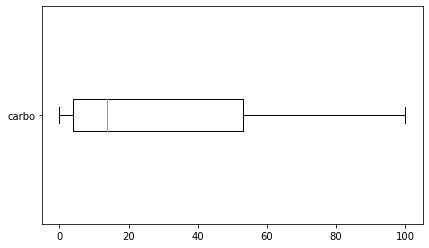

In [60]:
y_val = data_openff.loc[~data_openff['carbohydrates_100g'].isna(),"carbohydrates_100g"].values.tolist()
#print(len(y_val))
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.boxplot(y_val, vert=False)
plt.yticks([1], ['carbo'])
plt.show()

Nous allons créer des dataframes pour chaque catégorie, dans laquelle nous avons les sous-catégories associées pour traçer la distribution en glucide.

Alcoholic beverages 50 50
Beverages 4087 4087
Cereals and potatoes 5195 5195
Composite foods 5230 5230
Fat and sauces 2807 2807
Fish Meat Eggs 4772 4772
Fruits and vegetables 3226 3226
Milk and dairy products 5159 5159
Salty snacks 1800 1800
Sugary snacks 7675 7675


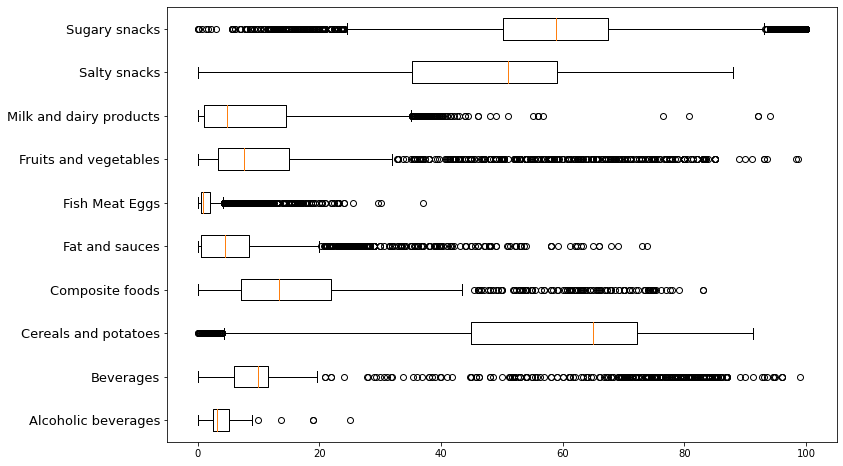

In [61]:
list_cat = sorted(data_openff.loc[~data_openff["pnns_groups_1"].isna(),"pnns_groups_1"].unique().tolist())
d = {}
y_val_1 = []
y_val_2 = []
for cat in list_cat:
    d[cat] = pd.DataFrame(data_openff.loc[data_openff["pnns_groups_1"]==cat])
    y_val = []    
    y_val = d[cat].loc[d[cat]["carbohydrates_100g"].notnull(),"carbohydrates_100g"].values.tolist()
    y_val_1 = d[cat].loc[~d[cat]["carbohydrates_100g"].isna(),"carbohydrates_100g"].values.tolist() 
    print(cat, len(y_val), len(y_val_1))
    y_val_2.append(y_val)
y_val = data_openff.loc[data_openff["carbohydrates_100g"].notnull(),"carbohydrates_100g"].values.tolist()

plt.figure(figsize=(12,8))
plt.boxplot(y_val_2[:], vert=False)
plt.yticks(np.arange(1,len(list_cat)+1,1), list_cat[:], fontsize=13)
plt.show()



Lorsque nous regardons la distribution du glucide globale, on voit qu'il n'y a pas de valeur atypique et que les valeurs vont de 0 à 100 g.
En revanche, lorsque nous regardons la distribution du glucide pour chaque catégorie, nous nous apercevons que la distribution dépend de la catégorie. Par exemple, pour les boissons alcoolisé il y a peu de glucide (entre 0 et 10 g) à l'inverse des produits salés qui contiennent entre 0 et 90 g de glucides.

Le fait de traçer la distribution d'une grandeur pour une catégorie donnée permet d'avoir une idée plus réaliste.


In [62]:
# Nous déterminons le nombre et les noms de sous-catégorie (pnns group 2) pour chaque catégorie (pnns group 1).
# Le but est d'établir les distributions pour chaque sous-catégorie.

import itertools
liste_group_2 = []
liste_open_2 = []
liste_group_1 = []
liste_open_1 = []
for cat in list_cat:
    liste_group_2.append(d[cat]["pnns_groups_2"].unique())
    print(cat, len(d[cat]["pnns_groups_2"].unique().tolist()))
    liste_open_2.append((data_openff.loc[data_openff["pnns_groups_1"]==cat,"pnns_groups_2"].unique()))

liste_group_1 = list(itertools.chain(*liste_group_2))
liste_open_1 = list(itertools.chain(*liste_open_2))
display(data_openff["pnns_groups_1"].unique())

Alcoholic beverages 1
Beverages 5
Cereals and potatoes 5
Composite foods 3
Fat and sauces 2
Fish Meat Eggs 5
Fruits and vegetables 4
Milk and dairy products 4
Salty snacks 3
Sugary snacks 4


array(['Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Alcoholic beverages', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces'], dtype=object)

Nous définissons les fonctions médiane pour déterminer la médiane et une fonction pour compter le nombre d'outliers.

In [63]:
def outlier_nbr(y):
    # finding the 1st quartile
    q1 = np.quantile(y, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(y, 0.75)
    med = np.median(y)
    # finding the iqr region
    iqr = q3-q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    A = np.array(y)
    outliers = A[(A <= lower_bound) | (A >= upper_bound)]
    return len(outliers)
    
def median(l):
    half = len(l) // 2
    l.sort()
    if not len(l) % 2:
        return (l[half - 1] + l[half]) / 2.0
    return l[half]

<a class="anchor" id="section_2_1_2"></a>
### Boxplots "Alcoholic beverages"

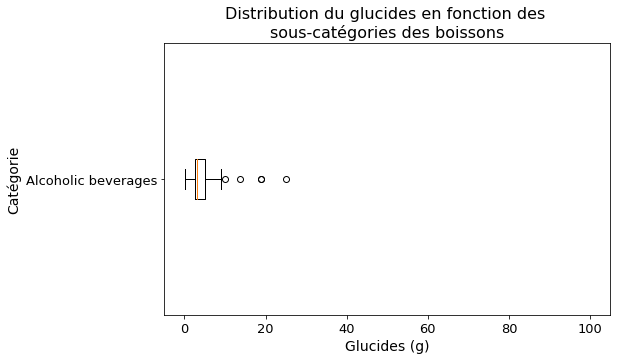

In [64]:
# Nous déterminons la moyenne, la médiane, le nombre d'outliers pour chaque catégorie

med_val = []
moy_val = []
out_val = []
cat_val = []

liste_pnns_2 = sorted(d["Alcoholic beverages"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Alcoholic beverages"]["pnns_groups_2"]==cat) & (~d["Alcoholic beverages"]["carbohydrates_100g"].isna())
    y_val = d["Alcoholic beverages"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)

plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des boissons", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_3"></a>
### Boxplots "Beverages"

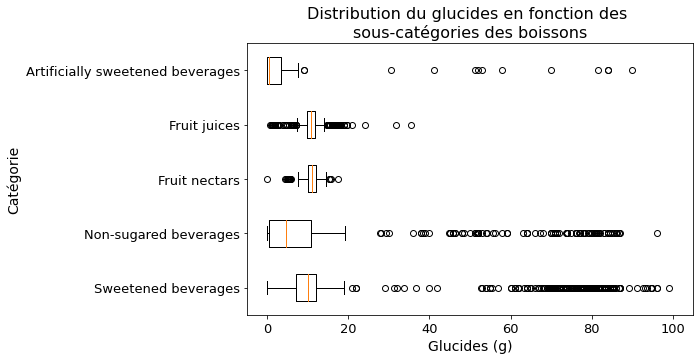

In [65]:
# Nous déterminons la moyenne, la médiane, le nombre d'outliers pour chaque catégorie

liste_pnns_2 = sorted(d["Beverages"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Beverages"]["pnns_groups_2"]==cat) & (~d["Beverages"]["carbohydrates_100g"].isna())
    y_val = d["Beverages"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)

plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3,4,5], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des boissons", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_4"></a>
### Boxplots "Cereals and potatoes"

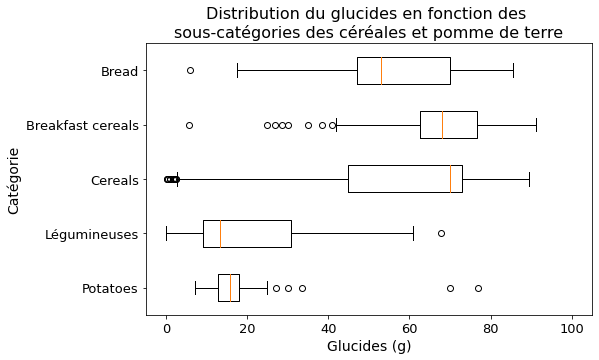

In [66]:
liste_pnns_2 = sorted(d["Cereals and potatoes"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []


for cat in liste_pnns_2:
    y_val = []
    mask = (d["Cereals and potatoes"]["pnns_groups_2"]==cat) & (~d["Cereals and potatoes"]["carbohydrates_100g"].isna())
    y_val = d["Cereals and potatoes"].loc[mask,"carbohydrates_100g"].values.tolist()
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
#print(len(med_val), len(cat_val))

plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3,4,5], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des céréales et pomme de terre", fontsize=16)
plt.show()


<a class="anchor" id="section_2_1_5"></a>
### Boxplots "Composite foods"

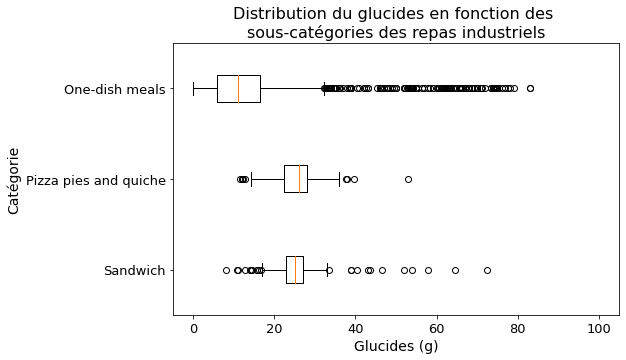

In [67]:
liste_pnns_2 = sorted(d["Composite foods"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Composite foods"]["pnns_groups_2"]==cat) & (~d["Composite foods"]["carbohydrates_100g"].isna())
    y_val = d["Composite foods"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des repas industriels", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_6"></a>
### Boxplots "Fat and sauces"

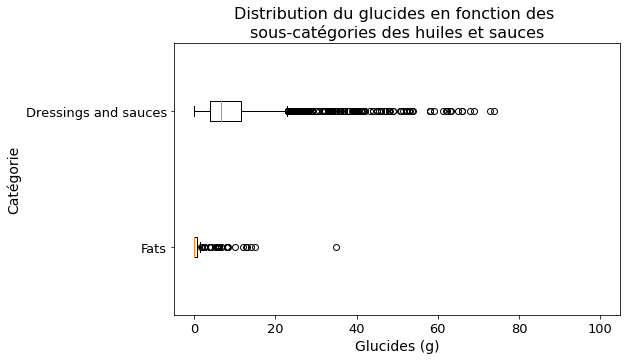

In [68]:
liste_pnns_2 = sorted(d["Fat and sauces"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Fat and sauces"]["pnns_groups_2"]==cat) & (~d["Fat and sauces"]["carbohydrates_100g"].isna())
    y_val = d["Fat and sauces"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des huiles et sauces", fontsize=16)
plt.show()



<a class="anchor" id="section_2_1_7"></a>
### Boxplots "Fish Meat Eggs"

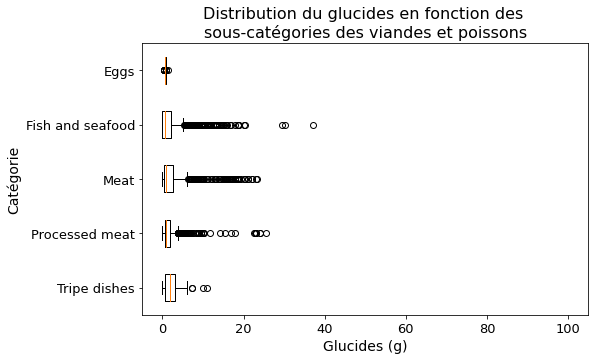

In [69]:
liste_pnns_2 = sorted(d["Fish Meat Eggs"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Fish Meat Eggs"]["pnns_groups_2"]==cat) & (~d["Fish Meat Eggs"]["carbohydrates_100g"].isna())
    y_val = d["Fish Meat Eggs"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)

    
plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3,4,5], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des viandes et poissons", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_8"></a>
### Boxplots "Fruits and vegetables"

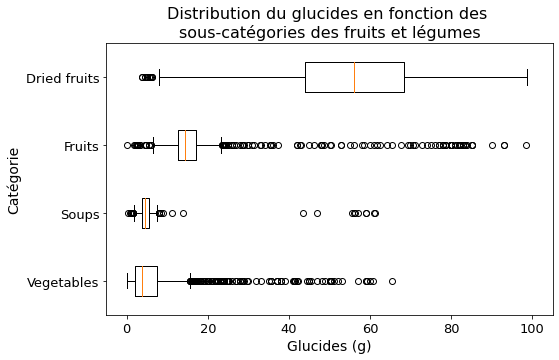

In [70]:
liste_pnns_2 = sorted(d["Fruits and vegetables"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Fruits and vegetables"]["pnns_groups_2"]==cat) & (~d["Fruits and vegetables"]["carbohydrates_100g"].isna())
    y_val = d["Fruits and vegetables"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3,4], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des fruits et légumes", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_9"></a>
### Boxplots "Milk and dairy products"

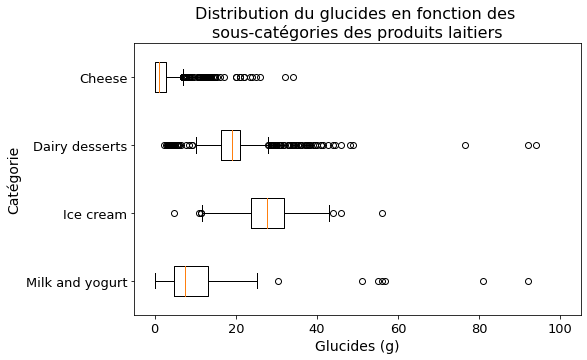

In [71]:
liste_pnns_2 = sorted(d["Milk and dairy products"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Milk and dairy products"]["pnns_groups_2"]==cat) & (~d["Milk and dairy products"]["carbohydrates_100g"].isna())
    y_val = d["Milk and dairy products"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3,4], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des produits laitiers", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_10"></a>
### Boxplots "Salty snacks"

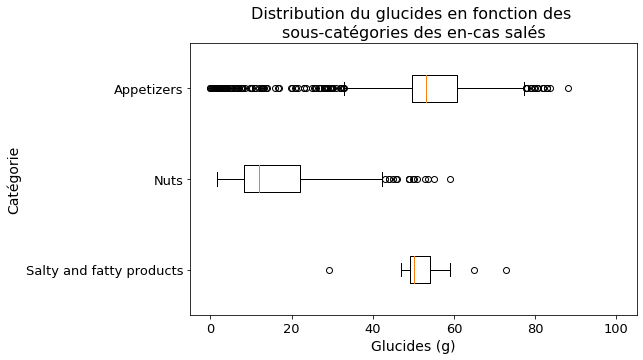

In [72]:
liste_pnns_2 = sorted(d["Salty snacks"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Salty snacks"]["pnns_groups_2"]==cat) & (~d["Salty snacks"]["carbohydrates_100g"].isna())
    y_val = d["Salty snacks"].loc[mask,"carbohydrates_100g"].values.tolist()
    #print(min(y_val))
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
    y_val_1.append(y_val)
plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des en-cas salés", fontsize=16)
plt.show()

<a class="anchor" id="section_2_1_11"></a>
### Boxplots "Sugary snacks"

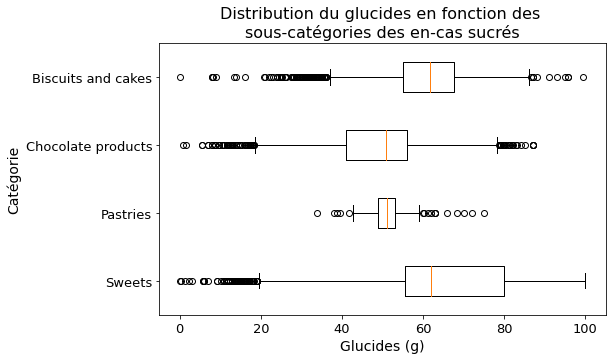

In [73]:
liste_pnns_2 = sorted(d["Sugary snacks"]["pnns_groups_2"].unique(),reverse=True)
y_val_1 = []
for cat in liste_pnns_2:
    y_val = []
    mask = (d["Sugary snacks"]["pnns_groups_2"]==cat) & (~d["Sugary snacks"]["carbohydrates_100g"].isna())
    y_val = d["Sugary snacks"].loc[mask,"carbohydrates_100g"].values.tolist()
    y_val_1.append(y_val)
    med_val.append(median(y_val))
    moy_val.append((sum(y_val)/len(y_val)))
    out_val.append(outlier_nbr(y_val))
    cat_val.append(cat)
#print(len(med_val), len(cat_val))

plt.figure(figsize=(8,5))
plt.boxplot(y_val_1[:], vert=False)
plt.yticks([1,2,3,4], liste_pnns_2[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Glucides (g)", fontsize = 14)
plt.xlim(-5,105)
plt.title("Distribution du glucides en fonction des \nsous-catégories des en-cas sucrés", fontsize=16)
plt.show()

<a class="anchor" id="section_2_2"></a>
## Boxplots des autres nutriments

Tout comme pour le glucide, le nutriscore n'est pas toujours indiqué. C'est pourquoi nous allons le calculer et nous allons d'abord:
- déterminer pour chaque variable la médiane, la moyenne et le nombre d'outliers pour chaque sous-catégorie
- faire une imputation par 0 (si le pourcentage de valeurs non nulles est inférieur à 20 %), la moyenne ou la médiane selon le présence ou non d'outliers. Pour certaines variables (lié aux sucres simples et les graisses), nous allons remplir les valeurs manquantes par 0.

<a class="anchor" id="section_2_2_1"></a>
### Boxplot "matières grasses"

Pour les matières grasses, ce qui importe est de savoir la quantité de graisse saturée. Dans le cas spécifiques des produits gras (huiles et beurre notamment), il faut faire le rapport des acide gras saturés sur l'ensemble des lipides présents dans le produits, d'où l'importance d'avoir gardé les variables liés aux matières grasses.

In [74]:
data_openff.loc[:,"fat_total"] = np.nan
data_openff.loc[data_openff["pnns_groups_2"]=="Fats","fat_total"] = data_openff.iloc[:,9:19].sum(axis=1) 
#data_openff.loc[:,"fat_total"] += data_openff["fat_100g"]

data_openff.loc[:,"fat_nutri"] = np.nan

data_openff.loc[data_openff["saturated-fat_100g"]==0,"fat_nutri"] = 0
data_openff.loc[data_openff["pnns_groups_2"]=="Fats","fat_nutri"] = data_openff["saturated-fat_100g"] *100/ data_openff["fat_total"]
data_openff.loc[data_openff["pnns_groups_2"]!="Fats","fat_nutri"] = data_openff["saturated-fat_100g"]
#data_openff.loc[:,"fat_nutri"] = data_openff["saturated-fat_100g"] *100/ data_openff["fat_total"]

#display(data_openff["saturated-fat_100g"].value_counts())
display(data_openff.info())
#display(data_openff.loc[(data_openff["pnns_groups_2"].notnull()) & (data_openff["fat_nutri"].isna()),"pnns_groups_2"].value_counts())
#display(data_openff.loc[(data_openff["pnns_groups_2"].notnull()) & (data_openff["fat_nutri"].notnull()),"pnns_groups_2"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54516 entries, 182 to 320765
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54189 non-null  object 
 1   quantity                     51747 non-null  object 
 2   categories                   54516 non-null  object 
 3   ingredients_text             46058 non-null  object 
 4   nutrition_grade_fr           40078 non-null  object 
 5   pnns_groups_1                54516 non-null  object 
 6   pnns_groups_2                54516 non-null  object 
 7   main_category                54516 non-null  object 
 8   main_category_fr             54516 non-null  object 
 9   fat_100g                     40398 non-null  float64
 10  saturated-fat_100g           40778 non-null  float64
 11  monounsaturated-fat_100g     1026 non-null   float64
 12  polyunsaturated-fat_100g     1037 non-null   float64
 13  omega-3-fat_1

None

36
35


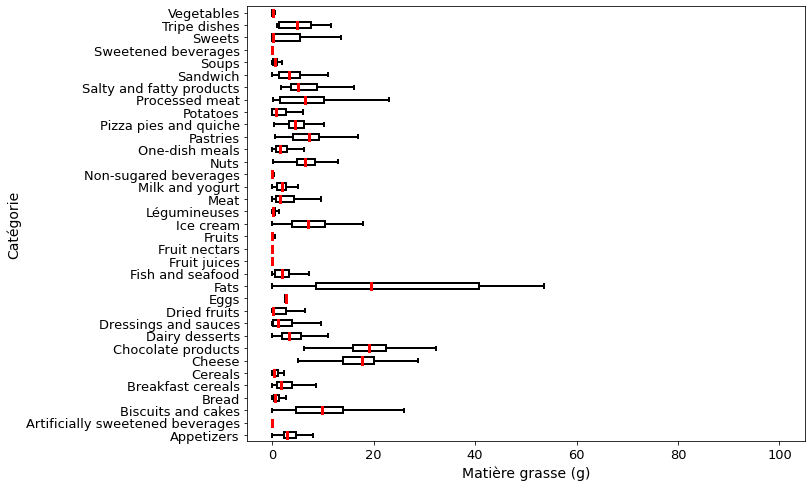

,product_name,quantity,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,fat_100g,...,starch_100g,polyols_100g,fiber_100g,nutrition-score-fr_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts_100g,NAN,fat_total,fat_nutri


In [75]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_fat=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"fat_nutri"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["fat_nutri"].notnull()) ,"fat_nutri"].values.tolist()
    rapp = len(val_ok)*100/len(val_tot)
    if rapp>20:
        liste_cat_fat.append(elt)
    else:
        continue

print(len(liste_cat))
print(len(liste_cat_fat))

val_fat_box =[]
val_outl = []
median_fat = []
moy_fat = []
for elt in liste_cat_fat[:]:
    val_fat = []
    val_fat = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["fat_nutri"].notnull()),"fat_nutri"].values.tolist()
    val_fat_box.append(val_fat)
    val_outl.append(outlier_nbr(val_fat))
    median_fat.append(median(val_fat))
    moy_fat.append(sum(val_fat)/len(val_fat))
    
plt.figure(figsize=(10,8))
plt.boxplot(val_fat_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))
plt.yticks(np.arange(1,(len(liste_cat_fat)+1),1), liste_cat_fat[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Matière grasse (g)", fontsize = 14)
plt.xlim(-5,105)
plt.show()

display(data_openff.loc[data_openff["fat_nutri"]>100,:])

<a class="anchor" id="section_2_2_2"></a>
### Boxplot "énergie"

36
35


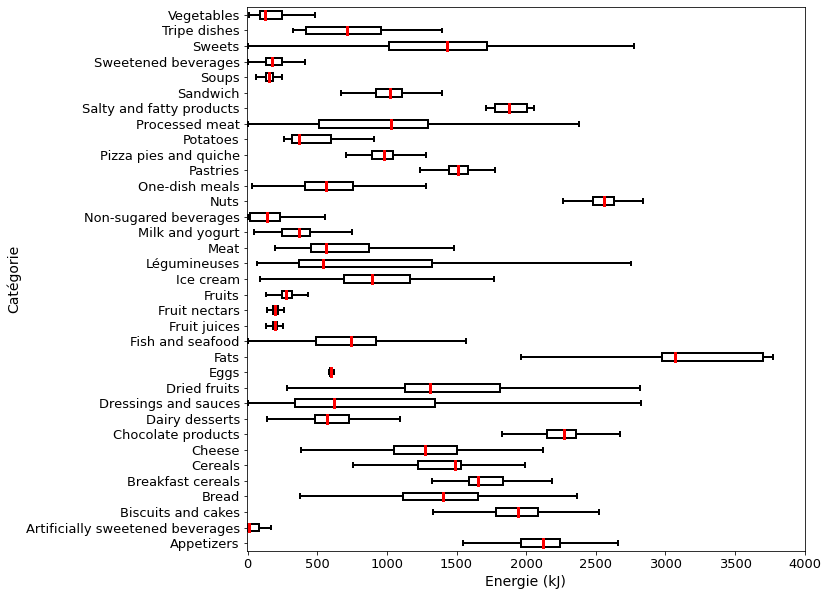

In [76]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_ener=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"energy_100g"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["energy_100g"].notnull()) ,"energy_100g"].values.tolist()
    rapp = len(val_ok)*100/len(val_tot)
    if rapp>20:
        liste_cat_ener.append(elt)
    else:
        continue
print(len(liste_cat))
print(len(liste_cat_ener))

val_ener_box =[]
val_outl_ener = []
median_ener = []
moy_ener = []
for elt in liste_cat_ener[:]:
    val_ener = []
    val_ener = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["energy_100g"].notnull()),"energy_100g"].values.tolist()
    val_ener_box.append(val_ener)
    val_outl_ener.append(outlier_nbr(val_ener))
    median_ener.append(median(val_ener))
    moy_ener.append(sum(val_ener)/len(val_ener))

plt.figure(figsize=(10,10))
plt.boxplot(val_ener_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))

plt.yticks(np.arange(1,(len(liste_cat_fat)+1),1), liste_cat_ener[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Energie (kJ)", fontsize = 14)
plt.xlim(-5,4000)
plt.show()

<a class="anchor" id="section_2_2_3"></a>
### Boxplot "sucre"

36
35


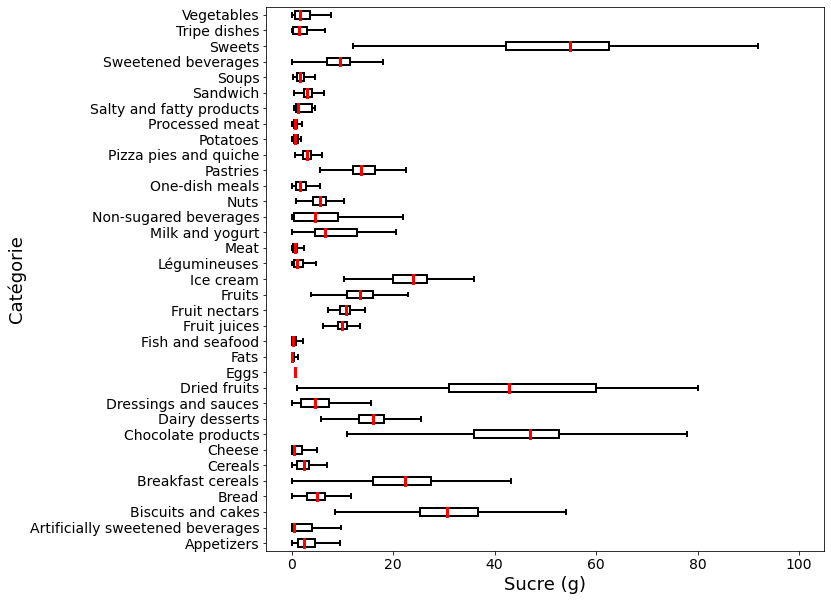

In [77]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_sucres=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"sugars_100g"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["sugars_100g"].notnull()) ,"sugars_100g"].values.tolist()
    rapp = len(val_ok)*100/len(val_tot)
    
    if rapp>20:
        liste_cat_sucres.append(elt)
    else:
        continue
        
print(len(liste_cat))
print(len(liste_cat_sucres))

val_sucres_box =[]
val_outl_sucres = []
median_sucres = []
moy_sucres = []
for elt in liste_cat_sucres[:]:
    val_sucres = []
    val_sucres = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["sugars_100g"].notnull()),"sugars_100g"].values.tolist()
    val_sucres_box.append(val_sucres)
    val_outl_sucres.append(outlier_nbr(val_sucres))
    median_sucres.append(median(val_sucres))
    moy_sucres.append(sum(val_sucres)/len(val_sucres))
    #print(elt, len(val_sucres), median(val_sucres),sum(val_sucres)/len(val_sucres))
plt.figure(figsize=(10,10))
plt.boxplot(val_sucres_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))

plt.yticks(np.arange(1,(len(liste_cat_sucres)+1),1), liste_cat_sucres[:], fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Catégorie", fontsize =18)
plt.xlabel("Sucre (g)", fontsize = 18)
plt.xlim(-5,105)
plt.show()

<a class="anchor" id="section_2_2_4"></a>
### Boxplot "Sodium"

36
35


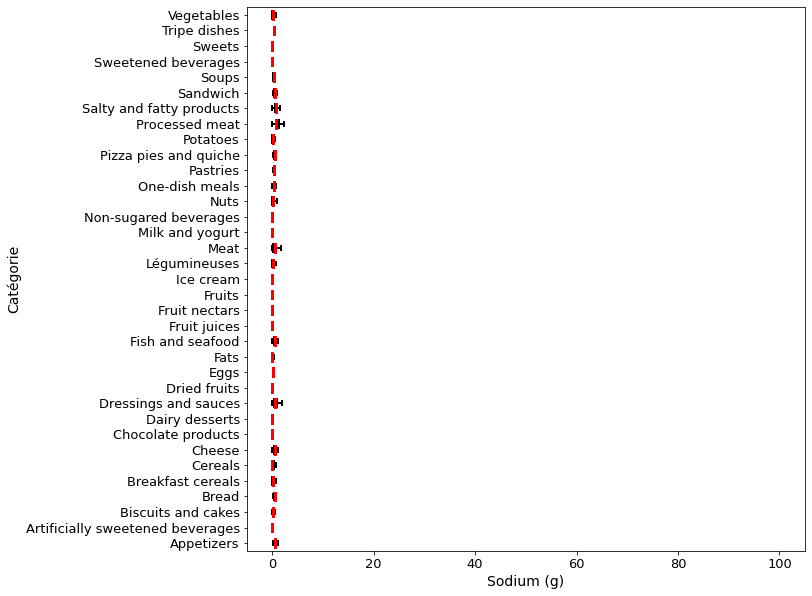

In [78]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_sod=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"sodium_100g"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["sodium_100g"].notnull()) ,"sodium_100g"].values.tolist()
    rapp = len(val_ok)*100/len(val_tot)
    
    if rapp>20:
        liste_cat_sod.append(elt)
    else:
        continue
        
print(len(liste_cat))
print(len(liste_cat_sod))

val_sod_box = []
val_outl_sod = []
median_sod = []
moy_sod = []
for elt in liste_cat_sod[:]:
    val_sod = []
    val_sod = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["sodium_100g"].notnull()),"sodium_100g"].values.tolist()
    val_sod_box.append(val_sod)
    val_outl_sod.append(outlier_nbr(val_sod))
    median_sod.append(median(val_sod))
    moy_sod.append(sum(val_sod)/len(val_sod))
plt.figure(figsize=(10,10))
plt.boxplot(val_sod_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))
plt.yticks(np.arange(1,len(liste_cat_sod)+1,1), liste_cat_sod[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Sodium (g)", fontsize = 14)
plt.xlim(-5,105)
plt.show()

<a class="anchor" id="section_2_2_5"></a>
### Boxplot "Fibres"

36
35


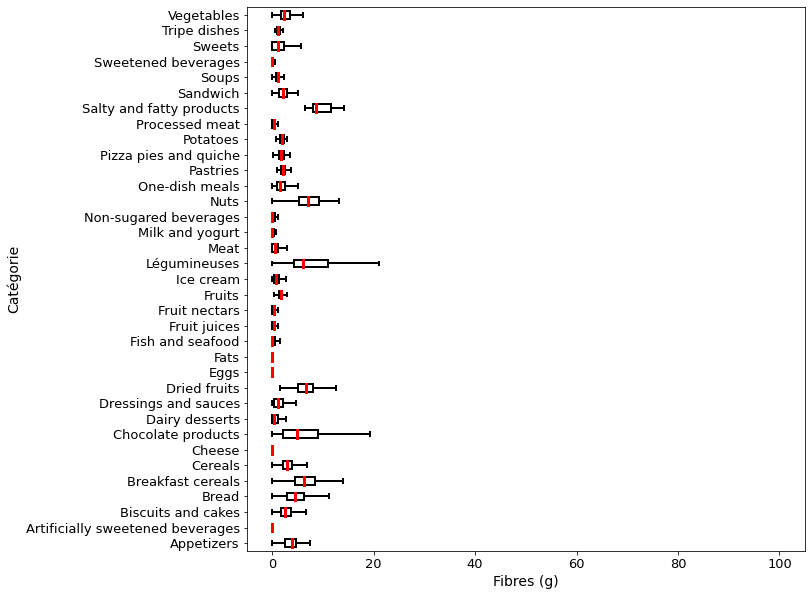

In [79]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_fib=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"fiber_100g"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["fiber_100g"].notnull()) ,"fiber_100g"].values.tolist()
    rapp = len(val_ok)*100/len(val_tot)
    
    if rapp>20:
        liste_cat_fib.append(elt)
    else:
        continue
        
print(len(liste_cat))
print(len(liste_cat_fib))

val_fib_box =[]
val_outl_fib = []
median_fib = []
moy_fib = []
for elt in liste_cat_fib[:]:
    val_fib = []
    val_fib = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["fiber_100g"].notnull()),"fiber_100g"].values.tolist()
    val_fib_box.append(val_fib)
    val_outl_fib.append(outlier_nbr(val_fib))
    median_fib.append(median(val_fib))
    moy_fib.append(sum(val_fib)/len(val_fib))

plt.figure(figsize=(10,10))
plt.boxplot(val_fib_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))
plt.yticks(np.arange(1,(len(liste_cat_fib)+1),1), liste_cat_fib[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Fibres (g)", fontsize = 14)
plt.xlim(-5,105)
plt.show()

<a class="anchor" id="section_2_2_6"></a>
### Boxplot "Protéines"

36
35


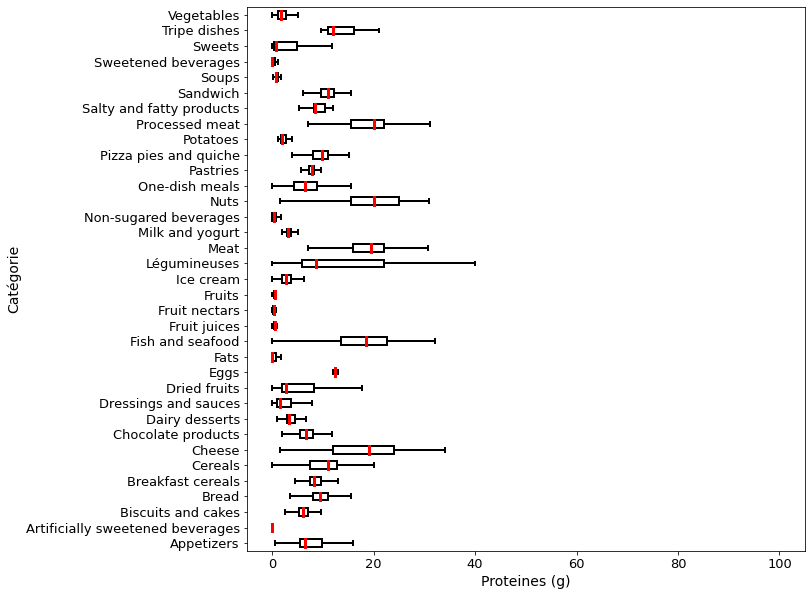

In [80]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_prot=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"proteins_100g"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["proteins_100g"].notnull()) ,"proteins_100g"].values.tolist()
    rapp = len(val_ok)*100/len(val_tot)
    
    if rapp>20:
        liste_cat_prot.append(elt)
    else:
        continue
        
print(len(liste_cat))
print(len(liste_cat_prot))
val_prot_box = []
val_outl_prot = []
median_prot = []
moy_prot = []
for elt in liste_cat_prot[:]:
    val_prot = []
    val_prot = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["proteins_100g"].notnull()),"proteins_100g"].values.tolist()
    val_prot_box.append(val_prot)
    val_outl_prot.append(outlier_nbr(val_prot))
    median_prot.append(median(val_prot))
    moy_prot.append(sum(val_prot)/len(val_prot))

plt.figure(figsize=(10,10))
plt.boxplot(val_prot_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))
plt.yticks(np.arange(1,(len(liste_cat_prot)+1),1), liste_cat_prot[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Proteines (g)", fontsize = 14)
plt.xlim(-5,105)
plt.show()

<a class="anchor" id="section_2_2_7"></a>
### Boxplot "Fruits/légumes/noix"

36
4


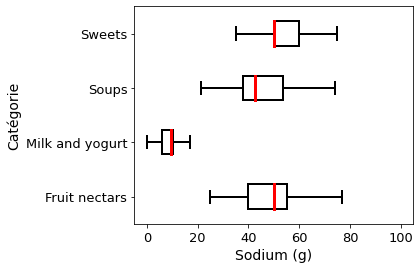

In [81]:
liste_cat = sorted(data_openff.loc[(data_openff["pnns_groups_2"].notnull()),"pnns_groups_2"].unique())
liste_cat_fruit=[]
for elt in liste_cat[:]:
    val_tot = data_openff.loc[(data_openff["pnns_groups_2"]==elt),"fruits-vegetables-nuts_100g"].values.tolist()
    val_ok = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["fruits-vegetables-nuts_100g"].notnull()) ,"fruits-vegetables-nuts_100g"].values.tolist()
    rapp = (len(val_ok))*100/(len(val_tot))
    #print(len(val_ok), len(val_tot), round(rapp,2))
    if rapp>10:
        liste_cat_fruit.append(elt)
    else:
        continue
        
print(len(liste_cat))
print(len(liste_cat_fruit))

val_fruit_box = []
val_outl_fruit = []
median_fruit = []
moy_fruit = []
for elt in liste_cat_fruit[:]:
    val_fruit = []
    val_fruit = data_openff.loc[(data_openff["pnns_groups_2"]==elt) & (data_openff["fruits-vegetables-nuts_100g"].notnull()),
                           "fruits-vegetables-nuts_100g"].values.tolist()
    
    val_fruit_box.append(val_fruit)
    val_outl_fruit.append(outlier_nbr(val_fruit))
    median_fruit.append(median(val_fruit))
    moy_fruit.append(sum(val_fruit)/len(val_fruit))

plt.figure(figsize=(5,4))
plt.boxplot(val_fruit_box[:], vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=3))
plt.yticks(np.arange(1,(len(liste_cat_fruit)+1),1), liste_cat_fruit[:], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Catégorie", fontsize =14)
plt.xlabel("Sodium (g)", fontsize = 14)
plt.xlim(-5,105)
plt.show()

Nous allons maintenant fusionner les données sur les moyennes, médianes et outliers associés aux glucides, matière grasse, énergie, protéines, sodium, fibres et fruits/légumes/noix. Cela permettra de faire les différentes imputations par la moyenne/la médiane.

In [82]:
med_moy_outl_ener = pd.DataFrame(list(zip(median_ener, moy_ener, val_outl_ener, liste_cat_ener)), 
                                columns=["Médiane_Ener", "Moyenne_Ener", "Outliers_Ener","pnns_groups_2"])
med_moy_outl_prot = pd.DataFrame(list(zip(median_prot , moy_prot, val_outl_prot, liste_cat_prot)), 
                                columns=["Médiane_Prot", "Moyenne_Prot", "Outliers_Prot","pnns_groups_2"])
med_moy_outl_fibr = pd.DataFrame(list(zip(median_fib, moy_fib, val_outl_fib, liste_cat_fib)), 
                                columns=["Médiane_Fib", "Moyenne_Fib", "Outliers_Fib","pnns_groups_2"])
med_moy_outl_sod = pd.DataFrame(list(zip(median_sod , moy_sod, val_outl_sod, liste_cat_sod)), 
                                columns=["Médiane_Sod", "Moyenne_Sod", "Outliers_Sod","pnns_groups_2"])
med_moy_outl_fruit = pd.DataFrame(list(zip(median_fruit , moy_fruit, val_outl_fruit, liste_cat_fruit)), 
                                columns=["Médiane_Fruit", "Moyenne_Fruit", "Outliers_Fruit","pnns_groups_2"])
med_moy_outl_fat = pd.DataFrame(list(zip(median_fat, moy_fat, val_outl, liste_cat_fat)), 
                                columns=["Médiane_Fat", "Moyenne_Fat", "Outliers_Fat","pnns_groups_2"])
med_moy_outl_sucres = pd.DataFrame(list(zip(median_sucres, moy_sucres, val_outl_sucres, liste_cat_sucres)), 
                                columns=["Médiane_Sucres", "Moyenne_Sucres", "Outliers_Sucres","pnns_groups_2"])
med_moy_outl_glu = pd.DataFrame(list(zip(med_val, moy_val, out_val, cat_val)), 
                                columns=["Médiane_Glu", "Moyenne_Glu", "Outliers_Glu","pnns_groups_2"])

from functools import reduce

data_gathered = [med_moy_outl_ener, med_moy_outl_glu, med_moy_outl_sucres, med_moy_outl_fat, med_moy_outl_sod,
                 med_moy_outl_prot, med_moy_outl_fibr,  med_moy_outl_fruit]
data_food = reduce(lambda  left,right: pd.merge(left,right,on=['pnns_groups_2'],
                                            how='outer'), data_gathered)

display(data_food.loc[data_food["Outliers_Fruit"].isna(),:])
#display(data_food.iloc[:,0:6])
#display(sorted(med_moy_outl_ener["pnns_groups_2"].unique().tolist()))
data_food = data_food.fillna(0)
data_med_moy = pd.merge(data_openff,data_food, left_on="pnns_groups_2", right_on="pnns_groups_2", how="outer")
display(data_food.max())
display(data_med_moy.info())


,Médiane_Ener,Moyenne_Ener,Outliers_Ener,pnns_groups_2,Médiane_Glu,Moyenne_Glu,Outliers_Glu,Médiane_Sucres,Moyenne_Sucres,Outliers_Sucres,...,Outliers_Sod,Médiane_Prot,Moyenne_Prot,Outliers_Prot,Médiane_Fib,Moyenne_Fib,Outliers_Fib,Médiane_Fruit,Moyenne_Fruit,Outliers_Fruit
0,2119.5,2021.024035,136.0,Appetizers,53.00,52.178426,132,2.50,4.152372,106.0,...,90.0,6.40,7.826560,51.0,4.0,3.992564,57.0,NaN,NaN,NaN
1,14.0,94.330146,13.0,Artificially sweetened beverages,0.50,4.942759,13,0.50,4.930258,11.0,...,26.0,0.00,0.156599,19.0,0.0,0.316938,22.0,NaN,NaN,NaN
2,1941.0,1884.987463,145.0,Biscuits and cakes,61.80,60.564688,106,30.70,30.953634,135.0,...,54.0,6.10,6.260515,132.0,2.6,3.070474,106.0,NaN,NaN,NaN
3,1405.5,1401.884003,2.0,Bread,53.00,57.445180,1,5.00,5.323991,40.0,...,138.0,9.50,9.560763,46.0,4.4,5.084621,37.0,NaN,NaN,NaN
4,1651.5,1691.959656,10.0,Breakfast cereals,68.00,69.117978,8,22.40,21.013518,4.0,...,18.0,8.30,8.745302,44.0,6.3,6.765547,25.0,NaN,NaN,NaN
5,1488.0,1337.337848,459.0,Cereals,70.00,58.317177,11,2.50,3.209316,123.0,...,98.0,11.00,10.092065,44.0,3.0,3.985662,242.0,NaN,NaN,NaN
6,1276.0,1215.908638,157.0,Cheese,1.00,1.900120,99,0.50,1.442280,133.0,...,79.0,19.00,18.026093,7.0,0.0,0.192737,826.0,NaN,NaN,NaN
7,2273.0,2181.186508,212.0,Chocolate products,50.90,48.214427,109,47.00,43.536983,73.0,...,55.0,6.70,6.986449,57.0,4.9,6.361008,42.0,NaN,NaN,NaN
8,573.0,643.302460,54.0,Dairy desserts,19.00,19.369147,111,16.00,15.848030,74.0,...,27.0,3.40,3.928360,54.0,0.3,0.715936,11.0,NaN,NaN,NaN
9,623.0,959.459544,52.0,Dressings and sauces,6.70,10.296159,264,4.50,7.298513,286.0,...,281.0,1.50,2.652470,72.0,1.2,1.441240,26.0,NaN,NaN,NaN


Médiane_Ener            3067.0
Moyenne_Ener       3029.362986
Outliers_Ener            459.0
pnns_groups_2       Vegetables
Médiane_Glu               70.0
Moyenne_Glu          69.117978
Outliers_Glu               264
Médiane_Sucres            54.9
Moyenne_Sucres       51.886664
Outliers_Sucres          433.0
Médiane_Fat           19.54023
Moyenne_Fat          28.071012
Outliers_Fat             365.0
Médiane_Sod           0.787402
Moyenne_Sod            1.03166
Outliers_Sod             281.0
Médiane_Prot             20.15
Moyenne_Prot         19.862345
Outliers_Prot            209.0
Médiane_Fib                8.7
Moyenne_Fib           9.692308
Outliers_Fib             826.0
Médiane_Fruit             50.0
Moyenne_Fruit         51.91004
Outliers_Fruit            63.0
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54516 entries, 0 to 54515
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54189 non-null  object 
 1   quantity                     51747 non-null  object 
 2   categories                   54516 non-null  object 
 3   ingredients_text             46058 non-null  object 
 4   nutrition_grade_fr           40078 non-null  object 
 5   pnns_groups_1                54516 non-null  object 
 6   pnns_groups_2                54516 non-null  object 
 7   main_category                54516 non-null  object 
 8   main_category_fr             54516 non-null  object 
 9   fat_100g                     40398 non-null  float64
 10  saturated-fat_100g           40778 non-null  float64
 11  monounsaturated-fat_100g     1026 non-null   float64
 12  polyunsaturated-fat_100g     1037 non-null   float64
 13  omega-3-fat_100g

None

<a class="anchor" id="section_2_3"></a>
## Imputation valeurs

Nous avons décomposé le texte de la variable "ingredients_text" et déterminé si ce dernier contenait un de mots-clés cités plus-haut. Nous allons fusionner l'ensemble des données (moyenne/médianne/outliers, le dataframe avec le glucide et celui avec les ingrédients). Puis nous complétons les données manquantes en moyenne et médiane.

<a class="anchor" id="section_2_3_1"></a>
### Imputation glucide et sucre
<a class="anchor" id="section_2_3_1_1"></a>
#### Ingrédients

Dans le cas du glucide, nous allons regarder  les valeurs manquantes et vérifier dans la variable "ingredients_text" si le sucre ou des mots similaires (sucres, sugars, glucose, fructose, lactose, maltose...) sont présents. 

In [83]:
d["nan"] = pd.DataFrame(data_openff.loc[data_openff["carbohydrates_100g"].isna()])
display(d["nan"].info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14515 entries, 182 to 320765
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 14281 non-null  object 
 1   quantity                     12536 non-null  object 
 2   categories                   14515 non-null  object 
 3   ingredients_text             8720 non-null   object 
 4   nutrition_grade_fr           2477 non-null   object 
 5   pnns_groups_1                14515 non-null  object 
 6   pnns_groups_2                14515 non-null  object 
 7   main_category                14515 non-null  object 
 8   main_category_fr             14515 non-null  object 
 9   fat_100g                     609 non-null    float64
 10  saturated-fat_100g           2512 non-null   float64
 11  monounsaturated-fat_100g     15 non-null     float64
 12  polyunsaturated-fat_100g     15 non-null     float64
 13  omega-3-fat_1

None

In [84]:
ingr = d["nan"].loc[(d["nan"]["ingredients_text"].notnull()) & (d["nan"]["carbohydrates_100g"].isna()) 
                       ,["ingredients_text"]].copy()
ingr["ingredients_text"] = ingr["ingredients_text"].str.lower()
result = ingr["ingredients_text"].str.split(("sucre"), expand=True)
results = ingr["ingredients_text"].str.split(("sucres"), expand=True)
result_eng = ingr["ingredients_text"].str.split(("sugar"), expand=True)
result_g = ingr["ingredients_text"].str.split(("glucose"), expand=True)
result_f = ingr["ingredients_text"].str.split(("fructose"), expand=True)
result_l = ingr["ingredients_text"].str.split(("lactose"), expand=True)
result_m = ingr["ingredients_text"].str.split(("maltose"), expand=True)
result_a = ingr["ingredients_text"].str.split(("amidon"), expand=True)


result = result.iloc[:,1:2]
result.columns = ["sucre_1"]
result = result[result["sucre_1"].notnull()]

results = results.iloc[:,1:2]
results.columns = ["sucres_1"]
results = results[results["sucres_1"].notnull()]

result_eng = result_eng.iloc[:,1:2]
result_eng.columns = ["sugar_1"]
result_eng = result_eng[result_eng["sugar_1"].notnull()]

result_g = result_g.iloc[:,1:2]
result_g.columns = ["glucose_1"]
result_g = result_g[result_g["glucose_1"].notnull()]

result_f = result_f.iloc[:,1:2]
result_f.columns = ["fructose_1"]
result_f = result_f[result_f["fructose_1"].notnull()]

result_l = result_l.iloc[:,1:2]
result_l.columns = ["lactose_1"]
result_l = result_l[result_l["lactose_1"].notnull()]

result_a = result_a.iloc[:,1:2]
result_a.columns = ["amidon_1"]
result_a = result_a[result_a["amidon_1"].notnull()]

display("Fichier sucre :", result.shape)
display("Fichier sucreS :", results.shape)
display("Fichier sugar :", result_eng.shape)
display("Fichier glucose :", result_g.shape)
display("Fichier fructose :", result_f.shape)
display("Fichier lactose :", result_l.shape)
display("Fichier amidon :", result_a.shape)
display(ingr.info())

#display(result.loc[result[3].notnull(),:])

'Fichier sucre :'

(2308, 1)

'Fichier sucreS :'

(48, 1)

'Fichier sugar :'

(15, 1)

'Fichier glucose :'

(799, 1)

'Fichier fructose :'

(219, 1)

'Fichier lactose :'

(393, 1)

'Fichier amidon :'

(599, 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 182 to 320765
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ingredients_text  8720 non-null   object
dtypes: object(1)
memory usage: 136.2+ KB


None

In [85]:
#ingr_sucre = pd.merge()
result_c = pd.merge(ingr, result, left_index=True, right_index=True, how="outer")

results_c = pd.merge(result_c, results, left_index=True, right_index=True, how="outer")

result_eng_c = pd.merge(results_c, result_eng, left_index=True, right_index=True, how="outer")

result_g_c = pd.merge(result_eng_c, result_g, left_index=True, right_index=True, how="outer")
result_f_c = pd.merge(result_g_c, result_f, left_index=True, right_index=True, how="outer")
result_l_c = pd.merge(result_f_c, result_l, left_index=True, right_index=True, how="outer")
result_a_c = pd.merge(result_l_c, result_a, left_index=True, right_index=True, how="outer")
result_a_c["NAN"] = (result_a_c.iloc[:,1:].isna().sum(axis=1))/7
result_a_c = result_a_c.loc[result_a_c["NAN"]<1]
result_a_c.drop(columns="NAN", inplace=True)
result_a_c = result_a_c.reset_index(drop=True)

val_sucre_med = data_med_moy.merge(result_a_c, left_index=True, right_index=True, how="outer")

val_sucre_med.drop(columns="ingredients_text_y", inplace=True)
val_sucre_med.rename(columns={"ingredients_text_x":"ingredients_text"}, inplace=True)

display(result_a_c.shape)
display(data_med_moy.shape)
display(val_sucre_med.info())



(2799, 8)

(54516, 61)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54516 entries, 0 to 54515
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54189 non-null  object 
 1   quantity                     51747 non-null  object 
 2   categories                   54516 non-null  object 
 3   ingredients_text             46058 non-null  object 
 4   nutrition_grade_fr           40078 non-null  object 
 5   pnns_groups_1                54516 non-null  object 
 6   pnns_groups_2                54516 non-null  object 
 7   main_category                54516 non-null  object 
 8   main_category_fr             54516 non-null  object 
 9   fat_100g                     40398 non-null  float64
 10  saturated-fat_100g           40778 non-null  float64
 11  monounsaturated-fat_100g     1026 non-null   float64
 12  polyunsaturated-fat_100g     1037 non-null   float64
 13  omega-3-fat_100g

None

<a class="anchor" id="section_2_3_1_2"></a>
#### Somme des sucres simples

Nous remplissons la variable glucide par la somme des sucres simples. Pour les valeurs de glucides manquantes mais dont on sait qu'il y a du sucre (via le dataframe sur les ingrédients), nous imputons ces valeurs par la moyenne ou la médiane.

In [86]:
#display(d["nan"].info())
gluc = d["nan"][["ingredients_text","carbohydrates_100g", "sugars_100g","sucrose_100g","glucose_100g", "fructose_100g", 
                    "lactose_100g", "maltose_100g","starch_100g","polyols_100g"]].copy()

gluc.loc[:,"nan"] = (gluc.iloc[:,2:].isna().sum(axis=1))/8
gluc = gluc.loc[gluc["nan"]<1,:]

display(gluc.info())
gluc.loc[((gluc["sugars_100g"].notnull()) |(gluc["glucose_100g"].notnull()) | (gluc["fructose_100g"].notnull()) | 
          (gluc["lactose_100g"].notnull()) | (gluc["maltose_100g"].notnull()) | (gluc["polyols_100g"].notnull()) | 
          (gluc["starch_100g"].notnull()) | (gluc["sucrose_100g"].notnull())),
         "carbohydrates_100g"] = gluc.iloc[:,1:9].sum(axis=1)
gluc = gluc[["carbohydrates_100g","sucrose_100g"]]
display(gluc.columns)
#display(gluc_nul.info())
#display(open_ff.loc[(open_ff["carbohydrates_100g"].isna()) & (open_ff["pnns_groups_2"].notnull()),:])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 463 to 320734
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingredients_text    722 non-null    object 
 1   carbohydrates_100g  0 non-null      float64
 2   sugars_100g         2527 non-null   float64
 3   sucrose_100g        0 non-null      float64
 4   glucose_100g        1 non-null      float64
 5   fructose_100g       1 non-null      float64
 6   lactose_100g        3 non-null      float64
 7   maltose_100g        1 non-null      float64
 8   starch_100g         0 non-null      float64
 9   polyols_100g        1 non-null      float64
 10  nan                 2528 non-null   float64
dtypes: float64(10), object(1)
memory usage: 237.0+ KB


None

Index(['carbohydrates_100g', 'sucrose_100g'], dtype='object')

In [87]:
list_sucre = val_sucre_med.loc[val_sucre_med["sucre_1"].notnull() & val_sucre_med["pnns_groups_2"].isna(), "pnns_groups_2"]
print((list_sucre))
display(val_sucre_med.info())

Series([], Name: pnns_groups_2, dtype: object)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54516 entries, 0 to 54515
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54189 non-null  object 
 1   quantity                     51747 non-null  object 
 2   categories                   54516 non-null  object 
 3   ingredients_text             46058 non-null  object 
 4   nutrition_grade_fr           40078 non-null  object 
 5   pnns_groups_1                54516 non-null  object 
 6   pnns_groups_2                54516 non-null  object 
 7   main_category                54516 non-null  object 
 8   main_category_fr             54516 non-null  object 
 9   fat_100g                     40398 non-null  float64
 10  saturated-fat_100g           40778 non-null  float64
 11  monounsaturated-fat_100g     1026 non-null   float64
 12  polyunsaturated-fat_100g   

None

In [88]:
colonne_sucre = val_sucre_med.iloc[:,61:].columns.tolist()
print(colonne_sucre)

for col in colonne_sucre:
    list_sucre = val_sucre_med.loc[val_sucre_med[col].notnull(), "pnns_groups_2"].unique().tolist()
    for elt in list_sucre:
        val_outl = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Outliers_Sucres"].unique()
        #print(elt, val_outl)
        if (val_outl!=0):
            media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Glu"].unique()
            m = media.item()
            #print(col,elt,m)
            val_sucre_med.loc[(val_sucre_med[col].notnull()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "carbohydrates_100g"] = m
        else:
            moye = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Glu"].unique()
            mo = moye.item()
            #print(col,elt,m)
            val_sucre_med.loc[(val_sucre_med[col].notnull()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "carbohydrates_100g"] = mo
display(val_sucre_med.info())

['sucre_1', 'sucres_1', 'sugar_1', 'glucose_1', 'fructose_1', 'lactose_1', 'amidon_1']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54516 entries, 0 to 54515
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54189 non-null  object 
 1   quantity                     51747 non-null  object 
 2   categories                   54516 non-null  object 
 3   ingredients_text             46058 non-null  object 
 4   nutrition_grade_fr           40078 non-null  object 
 5   pnns_groups_1                54516 non-null  object 
 6   pnns_groups_2                54516 non-null  object 
 7   main_category                54516 non-null  object 
 8   main_category_fr             54516 non-null  object 
 9   fat_100g                     40398 non-null  float64
 10  saturated-fat_100g           40778 non-null  float64
 11  monounsaturated-fat_100g     1026 non-null   

None

In [89]:
display(val_sucre_med["sugars_100g"].max())
display(val_sucre_med["carbohydrates_100g"].max())

100.0

100.0

Nous vérifions que le sucre est bien supérieur ou égal à la somme des sucres simples. Si ce n'est pas le cas, nous supprimons les individus. Nous vérifions aussi que la valeur en glucide est supérieure ou égale au sucre.

In [90]:
# Nous définissons des variables pour déterminer la quantité de sucre simple totale (hors sucres et avec sucres)
val_sucre_med.loc[:,"total_sucre_simple"] = np.nan
val_sucre_med.loc[:,"total_sucre"] = np.nan


val_sucre_med.loc[((val_sucre_med["glucose_100g"].notnull()) | (val_sucre_med["fructose_100g"].notnull()) | 
                  (val_sucre_med["lactose_100g"].notnull()) | (val_sucre_med["maltose_100g"].notnull()) | 
                  (val_sucre_med["polyols_100g"].notnull()) | (val_sucre_med["starch_100g"].notnull()) |
                  (val_sucre_med["sucrose_100g"].notnull())), "total_sucre_simple"] = val_sucre_med.iloc[:,22:29].sum(axis=1)

val_sucre_med.loc[(val_sucre_med["total_sucre_simple"].notnull()), 
                  "total_sucre"] = val_sucre_med.iloc[:,21:29].sum(axis=1)

# Nous vérifions que les valeurs du sucre ("sugars_100g") soient bien supérieures ou égales à celles du sucre simple total.
# Si ce n'est pas le cas, nous remplaçons la valeur "sugars_100g" par celle de la somme des sucres simples (avec ou sans sucre)

conditions = [(val_sucre_med["total_sucre"].notnull()) & (val_sucre_med['sugars_100g'].notnull()) &
              (val_sucre_med['total_sucre'] <= 100), 
              (val_sucre_med["total_sucre"].notnull()) & (val_sucre_med['sugars_100g'].notnull()) & 
              (val_sucre_med['total_sucre'] > 100),
              (val_sucre_med["total_sucre"].isna()) & (val_sucre_med['sugars_100g'].notnull()),
              (val_sucre_med["total_sucre"].isna()) & (val_sucre_med['sugars_100g'].isna())]

choices=[val_sucre_med['total_sucre'],val_sucre_med["sugars_100g"],val_sucre_med["sugars_100g"],np.nan]
              
#val_sucre_med.loc[:,"sugars_100g"] = np.select(conditions, choices)


# Nous vérifions que les valeurs du glucide soient bien supérieures ou égales à celles du sucre.
# Si ce n'est pas le cas, nous remplaçons la valeur glucide par celle de la somme des sucres simples (avec ou sans sucre)

conditions = [(val_sucre_med['carbohydrates_100g'].notnull()) & (val_sucre_med['sugars_100g'].notnull()) &
              (val_sucre_med['sugars_100g'] > val_sucre_med['carbohydrates_100g']),
              (val_sucre_med['carbohydrates_100g'].notnull()) & (val_sucre_med['sugars_100g'].notnull()) &
              (val_sucre_med['sugars_100g'] <= val_sucre_med['carbohydrates_100g']), 
              (val_sucre_med['carbohydrates_100g'].isna()) & (val_sucre_med['sugars_100g'].notnull()) & 
              (val_sucre_med['Médiane_Glu'] <= val_sucre_med['sugars_100g']),
              (val_sucre_med['carbohydrates_100g'].isna()) & (val_sucre_med['sugars_100g'].notnull()) & 
              (val_sucre_med['Médiane_Glu'] > val_sucre_med['sugars_100g']),
              (val_sucre_med['carbohydrates_100g'].isna()) & (val_sucre_med['sugars_100g'].isna())]

choices=[val_sucre_med['sugars_100g'],val_sucre_med['carbohydrates_100g'], val_sucre_med['sugars_100g'],np.nan, np.nan]

val_sucre_med.loc[:,"carbohydrates_100g"] = np.select(conditions, choices)

display(val_sucre_med["sugars_100g"].max())
display(val_sucre_med["carbohydrates_100g"].max())
display(val_sucre_med.loc[(val_sucre_med["total_sucre_simple"]>100) | (val_sucre_med["total_sucre"]>100),
                          ["sugars_100g","carbohydrates_100g","total_sucre_simple"]])
display(val_sucre_med.info())

100.0

100.0

,sugars_100g,carbohydrates_100g,total_sucre_simple
7260,95.8,96.6,94.3
8433,75.0,75.0,63.9
39302,56.8,73.6,72.9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54516 entries, 0 to 54515
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54189 non-null  object 
 1   quantity                     51747 non-null  object 
 2   categories                   54516 non-null  object 
 3   ingredients_text             46058 non-null  object 
 4   nutrition_grade_fr           40078 non-null  object 
 5   pnns_groups_1                54516 non-null  object 
 6   pnns_groups_2                54516 non-null  object 
 7   main_category                54516 non-null  object 
 8   main_category_fr             54516 non-null  object 
 9   fat_100g                     40398 non-null  float64
 10  saturated-fat_100g           40778 non-null  float64
 11  monounsaturated-fat_100g     1026 non-null   float64
 12  polyunsaturated-fat_100g     1037 non-null   float64
 13  omega-3-fat_100g

None

<a class="anchor" id="section_2_3_2"></a>
## Imputation par la moyenne/médiane

Nous remplissons les valeurs manquantes en glucides, sucres, énergie, matière grasse, protéines, sodium, fibres et fruits/légumes/noix à l'aide de la médiane et de la moyenne.

<a class="anchor" id="section_2_3_2_1"></a>
#### Imputation pour le glucide

In [91]:
# Remplissage des valeurs  manquantes en glucides

display("Il y a :", val_sucre_med.loc[val_sucre_med["carbohydrates_100g"].notnull(),"carbohydrates_100g"].value_counts().sum(),
        "valeurs non nulles")

mask_1 = (val_sucre_med["Outliers_Glu"]!=0)
list_group = sorted(val_sucre_med.loc[mask_1,"pnns_groups_2"].unique().tolist())
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Glu"].unique()
    #print(elt, media)
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["carbohydrates_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "carbohydrates_100g"] = m


    
mask_2 = (val_sucre_med["Outliers_Glu"]==0)
list_group = val_sucre_med.loc[mask_2,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Glu"].unique()
    #print(elt, media)
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["carbohydrates_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "carbohydrates_100g"] = m
#display(val_sucre_med["carbohydrates_100g"].max())
display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["carbohydrates_100g"].notnull(),
                                                  "carbohydrates_100g"].value_counts().sum(), "valeurs non nulles")

'Il y a :'

41252

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

<a class="anchor" id="section_2_3_2_2"></a>
#### Imputation pour le sucre

In [92]:
# Remplissage des valeurs en sucres

display("Il y a :", val_sucre_med.loc[val_sucre_med["sugars_100g"].notnull(),"sugars_100g"].value_counts().sum(), "valeurs non nulles")

mask_1 = (val_sucre_med["Outliers_Sucres"]!=0)
list_group = val_sucre_med.loc[mask_1,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Sucres"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["sugars_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "sugars_100g"] = m

    
mask_2 = (val_sucre_med["Outliers_Sucres"]==0)
list_group = val_sucre_med.loc[mask_2,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Sucres"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["sugars_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "sugars_100g"] = m


display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["sugars_100g"].notnull(),"sugars_100g"].value_counts().sum(),
        "valeurs non nulles")

'Il y a :'

40861

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

Comme nous venons de faire une imputation sur le sucre et les glucides, nous vérifions encore qu'il n'y a pas de valeurs en glucide inférieur aux sucres.

In [93]:

val_sucre_med.loc[(val_sucre_med["sugars_100g"].notnull()),"diff_sucres"] = val_sucre_med["carbohydrates_100g"]-val_sucre_med["sugars_100g"]

val_sucre_med.loc[(val_sucre_med["sugars_100g"].notnull()) & (val_sucre_med["diff_sucres"]<0), "carbohydrates_100g"] = val_sucre_med["sugars_100g"]

val_sucre_med.loc[(val_sucre_med["sugars_100g"].notnull()),"diff_sucres"] = val_sucre_med["carbohydrates_100g"]-val_sucre_med["sugars_100g"]

display(val_sucre_med.loc[val_sucre_med["diff_sucres"]==100,["carbohydrates_100g", "sugars_100g","sucrose_100g","glucose_100g", "fructose_100g", 
                    "lactose_100g", "maltose_100g","starch_100g","polyols_100g"]])
display(val_sucre_med["diff_sucres"].min())

,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,starch_100g,polyols_100g


0.0

Concernant les variables liés aux sucres simples, nous remplaçons les valeurs manquantes par 0.

In [94]:
val_sucre_med[["sucrose_100g","glucose_100g","fructose_100g","lactose_100g","maltose_100g","starch_100g",
               "polyols_100g"]] = val_sucre_med[["sucrose_100g","glucose_100g","fructose_100g","lactose_100g","maltose_100g","starch_100g",
               "polyols_100g"]].fillna(value=0)


<a class="anchor" id="section_2_3_2_3"></a>
#### Imputation pour l'énergie

In [95]:
# Remplissage des valeurs  d'energie

display("Il y a :", val_sucre_med.loc[val_sucre_med["energy_100g"].notnull(),"energy_100g"].value_counts().sum(),
        "valeurs non nulles")

mask_1 = (val_sucre_med["Outliers_Ener"]!=0)
list_group = val_sucre_med.loc[mask_1,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Ener"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["energy_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "energy_100g"] = m

mask_2 = (val_sucre_med["Outliers_Ener"]==0)
list_group = val_sucre_med.loc[mask_2,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Ener"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["energy_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "energy_100g"] = m
    
display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["energy_100g"].notnull(),"energy_100g"].value_counts().sum(), 
        "valeurs non nulles")

'Il y a :'

42587

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

<a class="anchor" id="section_2_3_2_4"></a>
#### Imputation pour les matières grasses

In [96]:
# Remplissage des valeurs  manquantes en matière grasse

display("Il y a :", val_sucre_med.loc[val_sucre_med["fat_nutri"].notnull(),"fat_nutri"].value_counts().sum(), 
        "valeurs non nulles")

mask_3 = (val_sucre_med["Outliers_Fat"]!=0)
list_group = val_sucre_med.loc[mask_3,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media_fat = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Fat"].unique()
    m_fat = media_fat.item()
    val_sucre_med.loc[(val_sucre_med["fat_nutri"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "fat_nutri"] = m_fat

    
mask_4 = (val_sucre_med["Outliers_Fat"]==0)
list_group = val_sucre_med.loc[mask_4,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    moy_fat = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Fat"].unique()
    mo_fat = moy_fat.item()
    val_sucre_med.loc[(val_sucre_med["fat_nutri"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "fat_nutri"] = mo_fat
    
display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["fat_nutri"].notnull(),"fat_nutri"].value_counts().sum(),
        "valeurs non nulles")

'Il y a :'

40778

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

<a class="anchor" id="section_2_3_2_5"></a>
### Imputation pour le sodium

In [97]:
# Remplissage des valeurs  de sodium    

display("Il y a :", val_sucre_med.loc[val_sucre_med["sodium_100g"].notnull(),"sodium_100g"].value_counts().sum(), 
        "valeurs non nulles")

mask_3 = (val_sucre_med["Outliers_Sod"]!=0)
list_group = val_sucre_med.loc[mask_3,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media_fat = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Sod"].unique()
    m_fat = media_fat.item()
    val_sucre_med.loc[(val_sucre_med["sodium_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "sodium_100g"] = m_fat

    
mask_4 = (val_sucre_med["Outliers_Sod"]==0)
list_group = val_sucre_med.loc[mask_4,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    moy_fat = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Sod"].unique()
    mo_fat = moy_fat.item()
    val_sucre_med.loc[(val_sucre_med["sodium_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "sodium_100g"] = mo_fat
    
    
display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["sodium_100g"].notnull(),"sodium_100g"].value_counts().sum(), 
        "valeurs non nulles")

'Il y a :'

40907

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

<a class="anchor" id="section_2_3_2_5"></a>
#### Imputation pour les fibres

In [98]:
# Remplissage des valeurs de fibres

display("Il y a :", val_sucre_med.loc[val_sucre_med["fiber_100g"].notnull(),"fiber_100g"].value_counts().sum(),
        "valeurs non nulles")

mask_1 = (val_sucre_med["Outliers_Fib"]!=0)
list_group = val_sucre_med.loc[mask_1,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Fib"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["fiber_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "fiber_100g"] = m


    
mask_2 = (val_sucre_med["Outliers_Fib"]==0)
list_group = val_sucre_med.loc[mask_2,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Fib"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["fiber_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "fiber_100g"] = m
    
display("Maintenant, il y a : :", val_sucre_med.loc[val_sucre_med["fiber_100g"].notnull(),"fiber_100g"].value_counts().sum(), 
        "valeurs non nulles")

'Il y a :'

26323

'valeurs non nulles'

'Maintenant, il y a : :'

54516

'valeurs non nulles'

<a class="anchor" id="section_2_3_2_6"></a>
### Imputation pour les protéines

In [99]:
# Remplissage des valeurs  de protéines 

display("Il y a :", val_sucre_med.loc[val_sucre_med["proteins_100g"].notnull(),"proteins_100g"].value_counts().sum(), 
        "valeurs non nulles")

mask_3 = (val_sucre_med["Outliers_Prot"]!=0)
list_group = val_sucre_med.loc[mask_3,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media_fat = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Prot"].unique()
    m_fat = media_fat.item()
    val_sucre_med.loc[(val_sucre_med["proteins_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "proteins_100g"] = m_fat

    
mask_4 = (val_sucre_med["Outliers_Prot"]==0)
list_group = val_sucre_med.loc[mask_4,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    moy_fat = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Prot"].unique()
    mo_fat = moy_fat.item()
    val_sucre_med.loc[(val_sucre_med["proteins_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "proteins_100g"] = mo_fat

display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["proteins_100g"].notnull(),
                                                  "proteins_100g"].value_counts().sum(), "valeurs non nulles")

'Il y a :'

42358

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

<a class="anchor" id="section_2_3_2_7"></a>
#### Imputation pour les fruits/légumes/noix

In [100]:
# Remplissage des valeurs de fruits

display("Il y a :", val_sucre_med.loc[val_sucre_med["fruits-vegetables-nuts_100g"].notnull(),
                                                  "fruits-vegetables-nuts_100g"].value_counts().sum(), "valeurs non nulles")
mask_1 = (val_sucre_med["Outliers_Fruit"]!=0)
list_group = val_sucre_med.loc[mask_1,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Médiane_Fruit"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "fruits-vegetables-nuts_100g"] = m


    
mask_2 = (val_sucre_med["Outliers_Fruit"]==0)
list_group = val_sucre_med.loc[mask_2,"pnns_groups_2"].unique().tolist()
#print(len(list_group))
   
for elt in list_group:
    
    media = val_sucre_med.loc[val_sucre_med["pnns_groups_2"]==elt,"Moyenne_Fruit"].unique()
    m = media.item()
    val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"].isna()) & (val_sucre_med["pnns_groups_2"]==elt)
                          , "fruits-vegetables-nuts_100g"] = m

display("Maintenant, il y a :", val_sucre_med.loc[val_sucre_med["fruits-vegetables-nuts_100g"].notnull(),
                                                  "fruits-vegetables-nuts_100g"].value_counts().sum(), "valeurs non nulles")

'Il y a :'

2182

'valeurs non nulles'

'Maintenant, il y a :'

54516

'valeurs non nulles'

In [101]:
val_sucre_med.loc[:, "Tot_var"] = np.nan
val_sucre_med.loc[:, "Tot_var"] = val_sucre_med["carbohydrates_100g"] + val_sucre_med["fiber_100g"] + val_sucre_med["sodium_100g"] +val_sucre_med["fat_nutri"] +val_sucre_med["proteins_100g"]
display(val_sucre_med["Tot_var"].max())
display(val_sucre_med["Tot_var"].shape)
display(val_sucre_med.loc[(val_sucre_med["Tot_var"]>100),["carbohydrates_100g","fiber_100g","sodium_100g","fat_nutri","proteins_100g","Tot_var"]].value_counts().sum())

155.17100000000002

(54516,)

181

In [102]:
val_sucre_med = val_sucre_med.loc[val_sucre_med["Tot_var"]<=100,:]
display(val_sucre_med.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54335 entries, 0 to 54515
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51587 non-null  object 
 2   categories                   54335 non-null  object 
 3   ingredients_text             45934 non-null  object 
 4   nutrition_grade_fr           39902 non-null  object 
 5   pnns_groups_1                54335 non-null  object 
 6   pnns_groups_2                54335 non-null  object 
 7   main_category                54335 non-null  object 
 8   main_category_fr             54335 non-null  object 
 9   fat_100g                     40280 non-null  float64
 10  saturated-fat_100g           40601 non-null  float64
 11  monounsaturated-fat_100g     1025 non-null   float64
 12  polyunsaturated-fat_100g     1036 non-null   float64
 13  omega-3-fat_100g

None

In [103]:
display(val_sucre_med["sodium_100g"].value_counts().sort_index())

0.000000e+00    5706
3.937007e-08       1
1.968504e-06       1
3.100000e-06       1
3.937008e-06       3
                ... 
1.456693e+01       1
1.500000e+01       1
2.800000e+01       1
2.913386e+01       1
3.000000e+01       1
Name: sodium_100g, Length: 1938, dtype: int64

In [104]:
display(val_sucre_med.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54335 entries, 0 to 54515
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51587 non-null  object 
 2   categories                   54335 non-null  object 
 3   ingredients_text             45934 non-null  object 
 4   nutrition_grade_fr           39902 non-null  object 
 5   pnns_groups_1                54335 non-null  object 
 6   pnns_groups_2                54335 non-null  object 
 7   main_category                54335 non-null  object 
 8   main_category_fr             54335 non-null  object 
 9   fat_100g                     40280 non-null  float64
 10  saturated-fat_100g           40601 non-null  float64
 11  monounsaturated-fat_100g     1025 non-null   float64
 12  polyunsaturated-fat_100g     1036 non-null   float64
 13  omega-3-fat_100g

None

<a class="anchor" id="chapter3"></a>
# Calcul du nutriscore

<a class="anchor" id="section_3_1"></a>
## Scoring

Nous allons maintenant calculer le nutriscore. Mais d'abord nous allons supprimer les variables qui ne sont plus utiles. 
Nous gardons uniquement les données ayant un nom de produit valide ainsi que l'ensemble des catégories non nulle ou inconnue.

In [105]:
val_sucre_med.drop(columns=["NAN", "sucre_1", "sucres_1", "sugar_1", "glucose_1", "fructose_1", "lactose_1", "fat_total",
                            "amidon_1", "total_sucre_simple","total_sucre", "diff_sucres","Tot_var"],inplace=True)
val_sucre_med.drop(columns=["categories", "ingredients_text", "fat_100g","saturated-fat_100g"],inplace=True)

val_sucre_med = val_sucre_med.loc[val_sucre_med["product_name"].notnull(),:]
display(val_sucre_med.shape)
display(val_sucre_med.info())

(54008, 55)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54008 entries, 0 to 54515
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51461 non-null  object 
 2   nutrition_grade_fr           39811 non-null  object 
 3   pnns_groups_1                54008 non-null  object 
 4   pnns_groups_2                54008 non-null  object 
 5   main_category                54008 non-null  object 
 6   main_category_fr             54008 non-null  object 
 7   monounsaturated-fat_100g     1023 non-null   float64
 8   polyunsaturated-fat_100g     1034 non-null   float64
 9   omega-3-fat_100g             588 non-null    float64
 10  alpha-linolenic-acid_100g    72 non-null     float64
 11  omega-6-fat_100g             118 non-null    float64
 12  linoleic-acid_100g           42 non-null     float64
 13  trans-fat_100g  

None

Nous calculons le nutriscore en respectant les seuils prédéfinis.

In [106]:
# Range energy : 335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350

val_sucre_med.loc[:, "V_Energy"] = np.nan
val_sucre_med.loc[:, "V_Sucres_simples"] = np.nan
val_sucre_med.loc[:, "V_Acides_gras_saturés"] = np.nan
val_sucre_med.loc[:, "V_Sodium"] = np.nan
val_sucre_med.loc[:, "V_Fruits_leg"] = np.nan
val_sucre_med.loc[:, "V_Fibres"] = np.nan
val_sucre_med.loc[:, "V_Protéines"] = np.nan


val_sucre_med.loc[(val_sucre_med["energy_100g"]<=335), "V_Energy"] = 0

val_sucre_med.loc[(val_sucre_med["energy_100g"]<=670) & (val_sucre_med["energy_100g"]>335), 
               "V_Energy"] = 1
val_sucre_med.loc[(val_sucre_med["energy_100g"]>670) & (val_sucre_med["energy_100g"]<=1005) , 
               "V_Energy"] = 2
val_sucre_med.loc[(val_sucre_med["energy_100g"]>1005) & (val_sucre_med["energy_100g"]<=1340) , 
               "V_Energy"] = 3
val_sucre_med.loc[(val_sucre_med["energy_100g"]>1340) & (val_sucre_med["energy_100g"]<=1675) , 
               "V_Energy"] = 4
val_sucre_med.loc[(val_sucre_med["energy_100g"]>1675) & (val_sucre_med["energy_100g"]<=2010) , 
               "V_Energy"] = 5
val_sucre_med.loc[(val_sucre_med["energy_100g"]>2010) & (val_sucre_med["energy_100g"]<=2345) , 
               "V_Energy"] = 6
val_sucre_med.loc[(val_sucre_med["energy_100g"]>2345) & (val_sucre_med["energy_100g"]<=2680) , 
               "V_Energy"] = 7
val_sucre_med.loc[(val_sucre_med["energy_100g"]>2680) & (val_sucre_med["energy_100g"]<=3015) , 
               "V_Energy"] = 8
val_sucre_med.loc[(val_sucre_med["energy_100g"]>3015) & (val_sucre_med["energy_100g"]<=3350) , 
               "V_Energy"] = 9
val_sucre_med.loc[(val_sucre_med["energy_100g"]>3350) , 
               "V_Energy"] = 10

# Energie boissons
val_sucre_med.loc[(val_sucre_med["energy_100g"]<=0) & (val_sucre_med["pnns_groups_1"]=="Beverages") 
               | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), "V_Energy"] = 0
val_sucre_med.loc[(val_sucre_med["energy_100g"]>0) & (val_sucre_med["energy_100g"]<=30) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 1
val_sucre_med.loc[(val_sucre_med["energy_100g"]>30) & (val_sucre_med["energy_100g"]<=60) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 2
val_sucre_med.loc[(val_sucre_med["energy_100g"]>60) & (val_sucre_med["energy_100g"]<=90) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 3
val_sucre_med.loc[(val_sucre_med["energy_100g"]>90) & (val_sucre_med["energy_100g"]<=120) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 4
val_sucre_med.loc[(val_sucre_med["energy_100g"]>120) & (val_sucre_med["energy_100g"]<=150) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 5
val_sucre_med.loc[(val_sucre_med["energy_100g"]>150) & (val_sucre_med["energy_100g"]<=180) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 6
val_sucre_med.loc[(val_sucre_med["energy_100g"]>180) & (val_sucre_med["energy_100g"]<=210) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 7
val_sucre_med.loc[(val_sucre_med["energy_100g"]>210) & (val_sucre_med["energy_100g"]<=240) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 8
val_sucre_med.loc[(val_sucre_med["energy_100g"]>240) & (val_sucre_med["energy_100g"]<=270) &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 9
val_sucre_med.loc[(val_sucre_med["energy_100g"]>270) & 
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Energy"] = 10



# Sucre (sauf boissons)
val_sucre_med.loc[(val_sucre_med["sugars_100g"]<=4.5) & (val_sucre_med["pnns_groups_1"]!="Beverages") 
               & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), "V_Sucres_simples"] = 0
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>4.5) & (val_sucre_med["sugars_100g"]<=9) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 1
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>9) & (val_sucre_med["sugars_100g"]<=13.5) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 2
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>13.5) & (val_sucre_med["sugars_100g"]<=18) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 3
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>18) & (val_sucre_med["sugars_100g"]<=22.5) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 4
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>22.5) & (val_sucre_med["sugars_100g"]<=27) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 5
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>27) & (val_sucre_med["sugars_100g"]<=31.5) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 6
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>31.5) & (val_sucre_med["sugars_100g"]<=36) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 7
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>36) & (val_sucre_med["sugars_100g"]<=41.5) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 8
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>41.5) & (val_sucre_med["sugars_100g"]<=45) &
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 9
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>45) & 
               (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages"), 
               "V_Sucres_simples"] = 10

# Sucre (uniquement boissons)
val_sucre_med.loc[(val_sucre_med["sugars_100g"]<=0) & (val_sucre_med["pnns_groups_1"]=="Beverages") 
               | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), "V_Sucres_simples"] = 0
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>0) & (val_sucre_med["sugars_100g"]<=1.5)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 1
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>1.5) & (val_sucre_med["sugars_100g"]<=3)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 2
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>3) & (val_sucre_med["sugars_100g"]<=4.5)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"),
               "V_Sucres_simples"] = 3
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>4.5) & (val_sucre_med["sugars_100g"]<=6)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 4
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>6) & (val_sucre_med["sugars_100g"]<=7.5)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 5
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>7.5) & (val_sucre_med["sugars_100g"]<=9)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 6
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>9) & (val_sucre_med["sugars_100g"]<=10.5)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 7
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>10.5) & (val_sucre_med["sugars_100g"]<=12)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 8
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>12) & (val_sucre_med["sugars_100g"]<=13.5)  &
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 9
val_sucre_med.loc[(val_sucre_med["sugars_100g"]>13.5) & 
               (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages"), 
               "V_Sucres_simples"] = 10


# Acide gras (sauf matières grasses)

val_sucre_med.loc[(val_sucre_med["fat_nutri"]<=1) & (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), 
               "V_Acides_gras_saturés"] = 0

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>1) & (val_sucre_med["fat_nutri"]<=2)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 1

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>2) & (val_sucre_med["fat_nutri"]<=3)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 2

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>3) & (val_sucre_med["fat_nutri"]<=4)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 3

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>4) & (val_sucre_med["fat_nutri"]<=5)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 4

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>5) & (val_sucre_med["fat_nutri"]<=6)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 5

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>6) & (val_sucre_med["fat_nutri"]<=7)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 6

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>7) & (val_sucre_med["fat_nutri"]<=8)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 7

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>8) & (val_sucre_med["fat_nutri"]<=9)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 8

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>9) & (val_sucre_med["fat_nutri"]<=10)  &
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 9

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>10) & 
               (val_sucre_med["pnns_groups_1"]!="Fat and sauces"), "V_Acides_gras_saturés"] = 10

# Acide gras (uniquement matières grasses)

val_sucre_med.loc[(val_sucre_med["fat_nutri"]<=10) & (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), 
               "V_Acides_gras_saturés"] = 0

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>10) & (val_sucre_med["fat_nutri"]<=16)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 1

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>16) & (val_sucre_med["fat_nutri"]<=22)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 2

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>22) & (val_sucre_med["fat_nutri"]<=28)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 3

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>28) & (val_sucre_med["fat_nutri"]<=34)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 4

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>34) & (val_sucre_med["fat_nutri"]<=40)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 5

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>40) & (val_sucre_med["fat_nutri"]<=46)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 6

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>46) & (val_sucre_med["fat_nutri"]<=52)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 7

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>52) & (val_sucre_med["fat_nutri"]<=58)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 8

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>58) & (val_sucre_med["fat_nutri"]<=64)  &
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 9

val_sucre_med.loc[(val_sucre_med["fat_nutri"]>64) & 
               (val_sucre_med["pnns_groups_1"]=="Fat and sauces"), "V_Acides_gras_saturés"] = 10


#Sodium
val_sucre_med.loc[(val_sucre_med["sodium_100g"]<=0.09), "V_Sodium"] = 0

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.09) & (val_sucre_med["sodium_100g"]<=0.18), "V_Sodium"] = 1

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.18) & (val_sucre_med["sodium_100g"]<=0.27), "V_Sodium"] = 2

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.27) & (val_sucre_med["sodium_100g"]<=0.36), "V_Sodium"] = 3

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.36) & (val_sucre_med["sodium_100g"]<=0.45), "V_Sodium"] = 4

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.45) & (val_sucre_med["sodium_100g"]<=0.54), "V_Sodium"] = 5

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.54) & (val_sucre_med["sodium_100g"]<=0.63), "V_Sodium"] = 6

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.63) & (val_sucre_med["sodium_100g"]<=0.72), "V_Sodium"] = 7

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.72) & (val_sucre_med["sodium_100g"]<=0.81), "V_Sodium"] = 8

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.81) & (val_sucre_med["sodium_100g"]<=0.9), "V_Sodium"] = 9

val_sucre_med.loc[(val_sucre_med["sodium_100g"]>0.9), "V_Sodium"] = 10

# Fibres

val_sucre_med.loc[(val_sucre_med["fiber_100g"]<=0.7), "V_Fibres"] = 0

val_sucre_med.loc[(val_sucre_med["fiber_100g"]>0.7) & (val_sucre_med["fiber_100g"]<=1.4), "V_Fibres"] = 1

val_sucre_med.loc[(val_sucre_med["fiber_100g"]>1.4) & (val_sucre_med["fiber_100g"]<=2.1), "V_Fibres"] = 2

val_sucre_med.loc[(val_sucre_med["fiber_100g"]>2.1) & (val_sucre_med["fiber_100g"]<=2.8), "V_Fibres"] = 3

val_sucre_med.loc[(val_sucre_med["fiber_100g"]>2.8) & (val_sucre_med["fiber_100g"]<=3.5), "V_Fibres"] = 4

val_sucre_med.loc[(val_sucre_med["fiber_100g"]>3.5), "V_Fibres"] = 5

# Proteins

val_sucre_med.loc[(val_sucre_med["proteins_100g"]<=1.6), "V_Protéines"] = 0

val_sucre_med.loc[(val_sucre_med["proteins_100g"]>1.6) & (val_sucre_med["proteins_100g"]<=3.2), "V_Protéines"] = 1

val_sucre_med.loc[(val_sucre_med["proteins_100g"]>3.2) & (val_sucre_med["proteins_100g"]<=4.8), "V_Protéines"] = 2

val_sucre_med.loc[(val_sucre_med["proteins_100g"]>4.8) & (val_sucre_med["proteins_100g"]<=6.4), "V_Protéines"] = 3

val_sucre_med.loc[(val_sucre_med["proteins_100g"]>6.4) & (val_sucre_med["proteins_100g"]<=8.0), "V_Protéines"] = 4

val_sucre_med.loc[(val_sucre_med["proteins_100g"]>8.0), "V_Protéines"] = 5


#Fruits/legumes (sauf boissons)

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]<=40) 
               & (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages")
               , "V_Fruits_leg"] = 0

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]>40) & (val_sucre_med["fruits-vegetables-nuts_100g"]<=60)
                & (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages")
               ,"V_Fruits_leg"] = 1

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]>60) & (val_sucre_med["fruits-vegetables-nuts_100g"]<=80)
               & (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages")
               , "V_Fruits_leg"] = 2

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]>80)
               & (val_sucre_med["pnns_groups_1"]!="Beverages") & (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages")
               , "V_Fruits_leg"] = 5

#Fruits/legumes (uniquement boissons)
val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]<=40) 
               & (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages")
               , "V_Fruits_leg"] = 0

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]>40) & (val_sucre_med["fruits-vegetables-nuts_100g"]<=60)
                & (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages")
               ,"V_Fruits_leg"] = 2

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]>60) & (val_sucre_med["fruits-vegetables-nuts_100g"]<=80)
               & (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages")
               , "V_Fruits_leg"] = 4

val_sucre_med.loc[(val_sucre_med["fruits-vegetables-nuts_100g"]>80)
               & (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages")
               , "V_Fruits_leg"] = 10

In [107]:
display(val_sucre_med.info())
display(val_sucre_med.iloc[:,56:].min())
display(val_sucre_med.iloc[:,56:].max())
#display(val_sucre_med.loc[(val_sucre_med["V_Energy"].isna()),"energy_100g"].value_counts())
#val_sucre_med.loc[(val_sucre_med["pnns_groups_1"]=="Fish Meat Eggs") & (val_sucre_med["V_Energy"].isna()),:] = 2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54008 entries, 0 to 54515
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51461 non-null  object 
 2   nutrition_grade_fr           39811 non-null  object 
 3   pnns_groups_1                54008 non-null  object 
 4   pnns_groups_2                54008 non-null  object 
 5   main_category                54008 non-null  object 
 6   main_category_fr             54008 non-null  object 
 7   monounsaturated-fat_100g     1023 non-null   float64
 8   polyunsaturated-fat_100g     1034 non-null   float64
 9   omega-3-fat_100g             588 non-null    float64
 10  alpha-linolenic-acid_100g    72 non-null     float64
 11  omega-6-fat_100g             118 non-null    float64
 12  linoleic-acid_100g           42 non-null     float64
 13  trans-fat_100g  

None

V_Sucres_simples         0.0
V_Acides_gras_saturés    0.0
V_Sodium                 0.0
V_Fruits_leg             0.0
V_Fibres                 0.0
V_Protéines              0.0
dtype: float64

V_Sucres_simples         10.0
V_Acides_gras_saturés    10.0
V_Sodium                 10.0
V_Fruits_leg             10.0
V_Fibres                  5.0
V_Protéines               5.0
dtype: float64

<a class="anchor" id="section_3_2"></a>
## Attribution des points

Nous calculons le nutriscore puis nous le comparons au nutriscore donné

In [108]:
# Nous calculons les différents points nécessaires pour le nutriscore. 
# Puis nous comparons le nutriscore calculé à celui du nutriscore donné dans la base de données.
display(val_sucre_med.shape)
val_sucre_med = val_sucre_med.loc[(val_sucre_med["energy_100g"]<4000) | (val_sucre_med["fat_nutri"]<=100) | 
                                  (val_sucre_med["sugars_100g"]<=100) | (val_sucre_med["fiber_100g"]<=100) | 
                                  (val_sucre_med["proteins_100g"]<=100) | (val_sucre_med["sodium_100g"]<=100) |
                                  (val_sucre_med["fruits-vegetables-nuts_100g"]<=100), :]

val_sucre_med = val_sucre_med.loc[(val_sucre_med["energy_100g"]>=0) | (val_sucre_med["fat_nutri"]>=0) | 
                                  (val_sucre_med["sugars_100g"]>=0) | (val_sucre_med["fiber_100g"]>=0) | 
                                  (val_sucre_med["proteins_100g"]>=0) | (val_sucre_med["sodium_100g"]>=0) |
                                  (val_sucre_med["fruits-vegetables-nuts_100g"]>=0), :]
val_sucre_med.loc[:, "points_A"] = np.nan
val_sucre_med.loc[:, "points_C"] = np.nan
val_sucre_med.loc[:, "points_C_sans_prot"] = np.nan


val_sucre_med.loc[mask_2 & (val_sucre_med["product_name"]=="Eau"),"nutriscore_C"] = -15


val_sucre_med.loc[(val_sucre_med["V_Energy"].notnull()) | (val_sucre_med["V_Sucres_simples"].notnull()) | 
                  (val_sucre_med["V_Acides_gras_saturés"].notnull())  | (val_sucre_med["V_Sodium"].notnull()),
                  "points_A"] = val_sucre_med.iloc[:,55:59].sum(axis=1)

val_sucre_med.loc[(val_sucre_med["V_Fruits_leg"].notnull()) | (val_sucre_med["V_Fibres"].notnull()) | 
              (val_sucre_med["V_Protéines"].notnull()),"points_C"] = val_sucre_med.iloc[:,59:62].sum(axis=1)

val_sucre_med.loc[(val_sucre_med["V_Fruits_leg"].notnull()) | (val_sucre_med["V_Fibres"].notnull()) , 
              "points_C_sans_prot"] = val_sucre_med.iloc[:,59:61].sum(axis=1)
                
val_sucre_med["nutriscore_C"] = val_sucre_med["points_A"] - val_sucre_med["points_C"]

val_sucre_med.loc[(val_sucre_med["points_A"]>=11) & (val_sucre_med["V_Fruits_leg"]<5) & (val_sucre_med["V_Fruits_leg"]>=0),
                  "nutriscore_C"] = (val_sucre_med["points_A"] - val_sucre_med["points_C_sans_prot"])

val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Cheese","nutriscore_C"] =  val_sucre_med["points_A"] - val_sucre_med["points_C"]


val_sucre_med.loc[(val_sucre_med["pnns_groups_1"]=="Beverages") & (val_sucre_med["product_name"]=="Eau"),"nutriscore_C"] = -15


val_sucre_med["diff_nutriscore"] = val_sucre_med["nutrition-score-fr_100g"] - val_sucre_med["nutriscore_C"]


#display((val_imp.loc[val_imp["saturated-fat_100g"]>70,:]))  
#display((open_ff_fr.loc[val_imp["saturated-fat_100g"]==100.0,:]))                          
#display(open_ff_fr["V_Protéines"].value_counts().sum())
#display(open_ff_fr["V_Protéines"].max())
#val_imp["NAN"] = (val_imp.iloc[:,2:9].isna().sum(axis=1))/7
#val_imp = val_imp.loc[val_imp["NAN"]<1,:]
display(val_sucre_med.info())
#display(val_imp["nutriscore_C"].std())
#display(val_imp["nutrition-score-fr_100g"].std())
#display(val_imp["diff_nutriscore"].std())

(54008, 62)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54008 entries, 0 to 54515
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51461 non-null  object 
 2   nutrition_grade_fr           39811 non-null  object 
 3   pnns_groups_1                54008 non-null  object 
 4   pnns_groups_2                54008 non-null  object 
 5   main_category                54008 non-null  object 
 6   main_category_fr             54008 non-null  object 
 7   monounsaturated-fat_100g     1023 non-null   float64
 8   polyunsaturated-fat_100g     1034 non-null   float64
 9   omega-3-fat_100g             588 non-null    float64
 10  alpha-linolenic-acid_100g    72 non-null     float64
 11  omega-6-fat_100g             118 non-null    float64
 12  linoleic-acid_100g           42 non-null     float64
 13  trans-fat_100g  

None

-15.0

40.0

-0.10539800557634825

2.918036962215136

-19.0

15.0

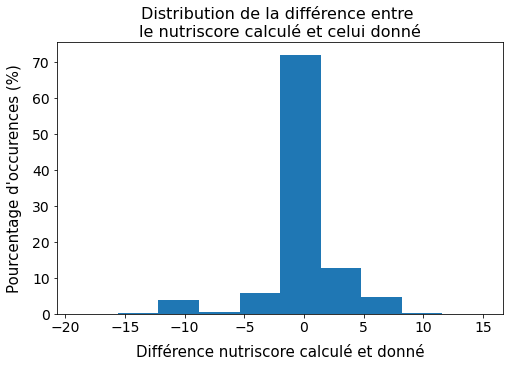

In [109]:
y_diff = val_sucre_med.loc[val_sucre_med["diff_nutriscore"].notnull(),"diff_nutriscore"].values.tolist()
display(val_sucre_med["nutriscore_C"].min())
display(val_sucre_med["nutriscore_C"].max())
display((val_sucre_med.loc[val_sucre_med["diff_nutriscore"].notnull(),"diff_nutriscore"].mean()))
display((val_sucre_med.loc[val_sucre_med["diff_nutriscore"].notnull(),"diff_nutriscore"].std()))
display((val_sucre_med.loc[val_sucre_med["diff_nutriscore"].notnull(),"diff_nutriscore"].min()))
display((val_sucre_med.loc[val_sucre_med["diff_nutriscore"].notnull(),"diff_nutriscore"].max()))
plt.figure(figsize=(8,5))
plt.hist(y_diff, weights=np.ones(len(y_diff))*100 / len(y_diff))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Différence nutriscore calculé et donné",fontsize=15, labelpad = 10)
plt.ylabel("Pourcentage d'occurences (%)",fontsize=15, labelpad = 10)
plt.title("Distribution de la différence entre \nle nutriscore calculé et celui donné",fontsize=16)
plt.show()

<a class="anchor" id="section_3_3"></a>
## Attribution des lettres

Nous pouvons voir qu'il n'y a globalement pas de différence entre le nutriscore calculé et celui donné dans le fichier source. 
Maintenant, nous attribuons une lettre pour chaque rangée de valeur.

A     8774
B     8057
C    10318
D    15257
E    11602
Name: Nutriscore_Lettres_C, dtype: int64

Les médianes sont: [1.7, 3.0, 3.0, 4.5, 10.7]
Les moyennes sont: [2.62, 5.14, 9.03, 15.88, 20.63]
Les écarts_types sont: [2.91, 5.63, 13.79, 21.87, 20.8]


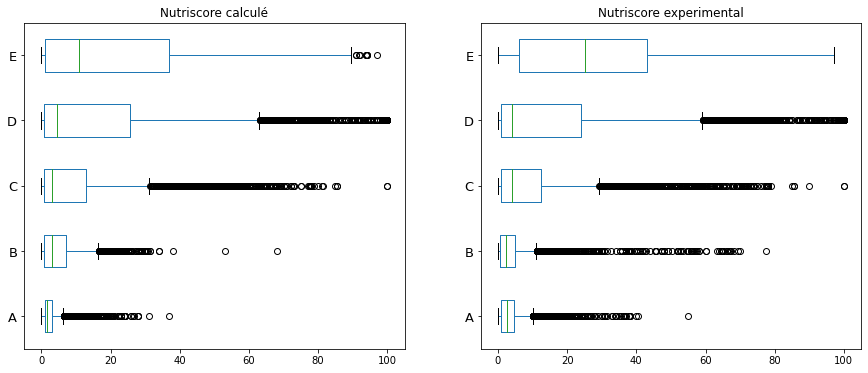

In [110]:
# Nous créeons une colonne nutriscore pour répartir les valeurs données dans "nutrition-score-fr_100g" en lettres

val_sucre_med["Nutriscore_Lettres_C"] = np.nan
val_sucre_med["Nutriscore_Lettres_exp"] = np.nan
#display(open_ff_2["nutrition-score-fr_100g"].min())
mask_1 = (val_sucre_med["pnns_groups_1"]!="Beverages") | (val_sucre_med["pnns_groups_1"]!="Alcoholic beverages")
val_sucre_med.loc[mask_1 & (val_sucre_med["nutriscore_C"]<=-1.) & (val_sucre_med["nutriscore_C"]>=-15.),
                  "Nutriscore_Lettres_C"] = "A"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutriscore_C"]<=2.) & (val_sucre_med["nutriscore_C"]>-1.)
                  ,"Nutriscore_Lettres_C"] = "B"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutriscore_C"]<=10.) & (val_sucre_med["nutriscore_C"]>2.)
                  ,"Nutriscore_Lettres_C"] = "C"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutriscore_C"]<=18.) & (val_sucre_med["nutriscore_C"]>10.)
                  ,"Nutriscore_Lettres_C"] = "D"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutriscore_C"]<=40.) & (val_sucre_med["nutriscore_C"]>18.)
                  ,"Nutriscore_Lettres_C"] = "E"

val_sucre_med.loc[mask_1 & (val_sucre_med["nutrition-score-fr_100g"]<=-1.) & (val_sucre_med["nutrition-score-fr_100g"]>=-15.),
                  "Nutriscore_Lettres_exp"] = "A"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutrition-score-fr_100g"]<=2.) & (val_sucre_med["nutrition-score-fr_100g"]>-1.),
                  "Nutriscore_Lettres_exp"] = "B"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutrition-score-fr_100g"]<=10.) & (val_sucre_med["nutrition-score-fr_100g"]>2.),
                  "Nutriscore_Lettres_exp"] = "C"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutrition-score-fr_100g"]<=18.) & (val_sucre_med["nutrition-score-fr_100g"]>10.),
                  "Nutriscore_Lettres_exp"] = "D"
val_sucre_med.loc[mask_1 & (val_sucre_med["nutrition-score-fr_100g"]<=40.) & (val_sucre_med["nutrition-score-fr_100g"]>18.),
                  "Nutriscore_Lettres_exp"] = "E"

mask_2 = (val_sucre_med["pnns_groups_1"]=="Beverages") | (val_sucre_med["pnns_groups_1"]=="Alcoholic beverages")
val_sucre_med.loc[mask_2 & (val_sucre_med["product_name"]=="Eau"),"Nutriscore_Lettres_C"] = "A"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutriscore_C"]<=1) ,"Nutriscore_Lettres_C"] = "B"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutriscore_C"]<=5) & (val_sucre_med["nutriscore_C"]>1)
                  ,"Nutriscore_Lettres_C"] = "C"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutriscore_C"]<=9) & (val_sucre_med["nutriscore_C"]>5)
                  ,"Nutriscore_Lettres_C"] = "D"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutriscore_C"]<=40.) & (val_sucre_med["nutriscore_C"]>9)
                  ,"Nutriscore_Lettres_C"] = "E"

val_sucre_med.loc[mask_2 & (val_sucre_med["product_name"]=="Eau"),"Nutriscore_Lettres_exp"] = "A"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutrition-score-fr_100g"]<=1) ,"Nutriscore_Lettres_exp"] = "B"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutrition-score-fr_100g"]<=5) & (val_sucre_med["nutrition-score-fr_100g"]>1),
                  "Nutriscore_Lettres_exp"] = "C"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutrition-score-fr_100g"]<=9) & (val_sucre_med["nutrition-score-fr_100g"]>5),
                  "Nutriscore_Lettres_exp"] = "D"
val_sucre_med.loc[mask_2 & (val_sucre_med["nutrition-score-fr_100g"]<=40) & (val_sucre_med["nutrition-score-fr_100g"]>9),
                  "Nutriscore_Lettres_exp"] = "E"


y_A = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_C"]=="A") ,"sugars_100g"].values.tolist()
y_B = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_C"]=="B") ,"sugars_100g"].values.tolist()
y_C = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_C"]=="C") ,"sugars_100g"].values.tolist()
y_D = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_C"]=="D") ,"sugars_100g"].values.tolist()
y_E = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_C"]=="E") ,"sugars_100g"].values.tolist()

y_A_exp = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_exp"]=="A") ,"sugars_100g"].values.tolist()
y_B_exp = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_exp"]=="B") ,"sugars_100g"].values.tolist()
y_C_exp = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_exp"]=="C") ,"sugars_100g"].values.tolist()
y_D_exp = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_exp"]=="D") ,"sugars_100g"].values.tolist()
y_E_exp = val_sucre_med.loc[(val_sucre_med["Nutriscore_Lettres_exp"]=="E") ,"sugars_100g"].values.tolist()

display(val_sucre_med["Nutriscore_Lettres_C"].value_counts().sort_index())
#print(len(y_A), len(y_B), len(y_C), len(y_D), len(y_E))

y_A = [x for x in y_A if np.isnan(x) == False]
y_B = [x for x in y_B if np.isnan(x) == False]
y_C = [x for x in y_C if np.isnan(x) == False]
y_D = [x for x in y_D if np.isnan(x) == False]
y_E = [x for x in y_E if np.isnan(x) == False]

y_A_exp = [x for x in y_A_exp if np.isnan(x) == False]
y_B_exp = [x for x in y_B_exp if np.isnan(x) == False]
y_C_exp = [x for x in y_C_exp if np.isnan(x) == False]
y_D_exp = [x for x in y_D_exp if np.isnan(x) == False]
y_E_exp = [x for x in y_E_exp if np.isnan(x) == False]

med_nutri = [median(y_A), median(y_B), median(y_C), median(y_D), median(y_E)]
moy_nutri = [round(sum(y_A)/len(y_A),2),round(sum(y_B)/len(y_B),2), round(sum(y_C)/len(y_C),2),round(sum(y_D)/len(y_D),2),
             round(sum(y_E)/len(y_E),2)]
std_nutri = [round(np.std(y_A),2), round(np.std(y_B),2), round(np.std(y_C),2), round(np.std(y_D),2), round(np.std(y_E),2)]

print("Les médianes sont:",med_nutri)
print("Les moyennes sont:",moy_nutri)
print("Les écarts_types sont:",std_nutri)
nutriscore_C = pd.DataFrame({'A': pd.Series(y_A), 'B': pd.Series(y_B), 'C': pd.Series(y_C), 'D': pd.Series(y_D),
                             'E': pd.Series(y_E)})
nutriscore_exp = pd.DataFrame({'A': pd.Series(y_A_exp), 'B': pd.Series(y_B_exp), 'C': pd.Series(y_C_exp), 
                               'D': pd.Series(y_D_exp), 'E': pd.Series(y_E_exp)})

plt.figure(figsize=[15,6])
plt.subplot(121)
boxplot = nutriscore_C.boxplot(column=["A", "B", "C", "D", "E"], vert=False, grid = False)
plt.yticks([1,2,3,4,5], ["A", "B", "C", "D", "E"], fontsize=13)
plt.title("Nutriscore calculé")
plt.subplot(122)
boxplot = nutriscore_exp.boxplot(column=["A", "B", "C", "D", "E"], vert=False, grid = False)
plt.yticks([1,2,3,4,5], ["A", "B", "C", "D", "E"], fontsize=13)
plt.title("Nutriscore experimental")
plt.show()

Nous allons comparer les résultats via une matrice de confusion

Calculé,A,B,C,D,E,All
Exp,,,,,,
A,83.1,14.4,2.5,0.0,0.0,6949
B,10.3,78.8,4.4,2.9,3.7,5729
C,1.1,7.8,79.2,1.3,10.6,8561
D,0.0,0.1,11.0,86.6,2.3,10864
E,0.0,0.0,0.1,12.0,87.9,7709
All,16.2,15.5,21.1,26.6,20.5,39812


A     6949
B     5729
C     8561
D    10864
E     7709
Name: Nutriscore_Lettres_exp, dtype: int64

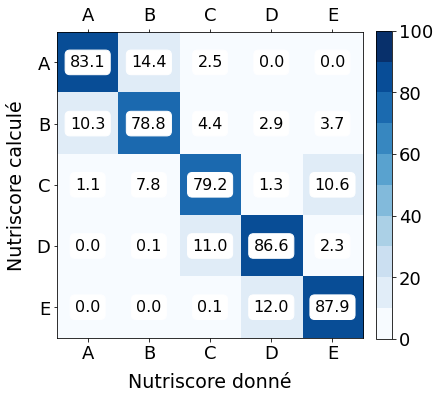

In [111]:
from matplotlib import colors
confusion_matrix = pd.crosstab(val_sucre_med['Nutriscore_Lettres_exp'], val_sucre_med['Nutriscore_Lettres_C'], 
                               rownames=['Exp'], colnames=['Calculé'],margins=True)
confusion_matrix["A"] = confusion_matrix["A"]*100/confusion_matrix["All"]
confusion_matrix["B"] = confusion_matrix["B"]*100/confusion_matrix["All"]
confusion_matrix["C"] = confusion_matrix["C"]*100/confusion_matrix["All"]
confusion_matrix["D"] = confusion_matrix["D"]*100/confusion_matrix["All"]
confusion_matrix["E"] = confusion_matrix["E"]*100/confusion_matrix["All"]
#confusion_matrix["All"] = confusion_matrix["All"]*100/confusion_matrix["All"]
display(round(confusion_matrix,1))
display(val_sucre_med['Nutriscore_Lettres_exp'].value_counts().sort_index())
col = confusion_matrix.iloc[:-1,:-1].columns.values.tolist()
#print(col)

plt.figure(figsize=[6,6])
cmap=plt.cm.get_cmap('Blues', 10)
boundaries = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
plt.matshow(confusion_matrix.iloc[:-1,:-1],cmap=cmap, fignum=1,norm=norm)

for (x, y), value in np.ndenumerate(confusion_matrix.iloc[:-1,:-1].T):
    plt.text(x, y, f"{value:.1f}", va="center", ha="center", fontsize=16, bbox=dict(boxstyle='round', 
                                                                                    facecolor='white', edgecolor='1'))

plt.xticks(range(len(col)), col, fontsize=18, rotation=0)
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

plt.yticks(range(len(col)), col, fontsize=18)
plt.xlabel("Nutriscore donné", fontsize=19, labelpad=10)
plt.ylabel("Nutriscore calculé",fontsize=19, labelpad=10)
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=18)
#plt.colorbar()
plt.show()
plt.show()

Il y a une correspondance d'environ 83 % entre les valeurs données et actuelles.
Nous pouvons voir qu'il y a des scores obtenus par le calcul qui sont d'un rang inférieur à celui donné (10,3 % des valeurs ont un score A par le calcul et un score B actuel).
Les différences peuvent être attribuées à des valeurs abérrantes difficilement détectables (<100 mais qui ne sortent pas forcément du lot lorsque nous les analysons sur une boxplot) et par des imputations de valeurs qui faussent un peu les valeurs et donc le calcul.

<a class="anchor" id="section_3_4"></a>
## Finalisation et exportation des données

Nous réorganisons les variables en regroupant las variables numériques entre elles et les variables catégorielles entre elles.

In [112]:
six_col = val_sucre_med.pop('nutrition-score-fr_100g')
sept_col = val_sucre_med.pop('diff_nutriscore')
trois_col = val_sucre_med.pop('nutriscore_C')
huit_col = val_sucre_med.pop('Nutriscore_Lettres_C')
neuf_col = val_sucre_med.pop('Nutriscore_Lettres_exp')
val_sucre_med.insert(5, 'nutrition-score-fr_100g', six_col)
val_sucre_med.insert(6, 'diff_nutriscore', sept_col)
val_sucre_med.insert(7, 'nutriscore_C', trois_col)
val_sucre_med.insert(8, 'Nutriscore_Lettres_C', huit_col)
val_sucre_med.insert(9, 'Nutriscore_Lettres_exp', neuf_col)
display(val_sucre_med.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54008 entries, 0 to 54515
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51461 non-null  object 
 2   nutrition_grade_fr           39811 non-null  object 
 3   pnns_groups_1                54008 non-null  object 
 4   pnns_groups_2                54008 non-null  object 
 5   nutrition-score-fr_100g      39811 non-null  float64
 6   diff_nutriscore              39811 non-null  float64
 7   nutriscore_C                 54008 non-null  float64
 8   Nutriscore_Lettres_C         54008 non-null  object 
 9   Nutriscore_Lettres_exp       39812 non-null  object 
 10  main_category                54008 non-null  object 
 11  main_category_fr             54008 non-null  object 
 12  monounsaturated-fat_100g     1023 non-null   float64
 13  polyunsaturated-

None

Il ne reste plus qu'à déterminer le concept de portion pour les différentes sous-catégories.
Enfin, nous allons exporter les données pour l'analyse des données.

In [113]:
val_sucre_med.loc[:, "Portion"] = 100
val_sucre_med.loc[val_sucre_med["pnns_groups_1"]=="Alcoholic beverages","Portion"] = 200
val_sucre_med.loc[val_sucre_med["pnns_groups_1"]=="Beverages","Portion"] = 200
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Biscuits and cakes","Portion"] = 20
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Breakfast cereals","Portion"] = 40
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Cheese","Portion"] = 30
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Chocolate products","Portion"] = 20
val_sucre_med.loc[val_sucre_med["pnns_groups_1"]=="Fat and sauces","Portion"] = 10
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Nuts","Portion"] = 50
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Salty and fatty products","Portion"] = 30
val_sucre_med.loc[val_sucre_med["pnns_groups_2"]=="Sweets","Portion"] = 15

val_sucre_med.loc[:, "Energie_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["energy_100g"])/100),2)
val_sucre_med.loc[:, "Glucide_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["carbohydrates_100g"])/100),2)
val_sucre_med.loc[:, "Sucre_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["sugars_100g"])/100),2)
val_sucre_med.loc[:, "Graisse_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["fat_nutri"])/100),2)
val_sucre_med.loc[:, "Sodium_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["sodium_100g"])/100),2)
val_sucre_med.loc[:, "Fibre_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["fiber_100g"])/100),2)
val_sucre_med.loc[:, "Protéine_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["proteins_100g"])/100),2)
val_sucre_med.loc[:, "Fruit_portion"] = round(((val_sucre_med["Portion"]*val_sucre_med["fruits-vegetables-nuts_100g"])/100),2)


In [114]:
display(val_sucre_med.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54008 entries, 0 to 54515
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51461 non-null  object 
 2   nutrition_grade_fr           39811 non-null  object 
 3   pnns_groups_1                54008 non-null  object 
 4   pnns_groups_2                54008 non-null  object 
 5   nutrition-score-fr_100g      39811 non-null  float64
 6   diff_nutriscore              39811 non-null  float64
 7   nutriscore_C                 54008 non-null  float64
 8   Nutriscore_Lettres_C         54008 non-null  object 
 9   Nutriscore_Lettres_exp       39812 non-null  object 
 10  main_category                54008 non-null  object 
 11  main_category_fr             54008 non-null  object 
 12  monounsaturated-fat_100g     1023 non-null   float64
 13  polyunsaturated-

None

In [115]:
val_nutri = val_sucre_med
col_à_eff = val_nutri.iloc[:,10:20].columns.values.tolist()
val_nutri = val_nutri.drop(columns=col_à_eff)

col_à_eff = val_nutri.iloc[:,13:20].columns.values.tolist()
val_nutri = val_nutri.drop(columns=col_à_eff)

col_à_eff = val_nutri.iloc[:,18:42].columns.values.tolist()
val_nutri = val_nutri.drop(columns=col_à_eff)

display(val_nutri.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54008 entries, 0 to 54515
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 54008 non-null  object 
 1   quantity                     51461 non-null  object 
 2   nutrition_grade_fr           39811 non-null  object 
 3   pnns_groups_1                54008 non-null  object 
 4   pnns_groups_2                54008 non-null  object 
 5   nutrition-score-fr_100g      39811 non-null  float64
 6   diff_nutriscore              39811 non-null  float64
 7   nutriscore_C                 54008 non-null  float64
 8   Nutriscore_Lettres_C         54008 non-null  object 
 9   Nutriscore_Lettres_exp       39812 non-null  object 
 10  energy_100g                  54008 non-null  float64
 11  carbohydrates_100g           54008 non-null  float64
 12  sugars_100g                  54008 non-null  float64
 13  fiber_100g      

None

In [116]:
val_nutri.to_csv('C:/Users/farid/Documents/Notebook/data_clean_projet_3.csv')


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,val_t
energy_100g,1.0000,0.0372,0.0318,0.0301,0.0171,0.0235,0.0196,-0.0025,-0.0025,0.0333,0
fat_100g,0.0372,1.0000,0.7407,-0.0693,0.0032,0.0766,0.1412,0.0098,0.0098,0.5735,2
saturated-fat_100g,0.0318,0.7407,1.0000,-0.0210,0.0804,0.0194,0.1437,0.0083,0.0083,0.6007,2
carbohydrates_100g,0.0301,-0.0693,-0.0210,1.0000,0.6395,0.2454,-0.1293,-0.0799,-0.0799,0.2440,1
sugars_100g,0.0171,0.0032,0.0804,0.6395,1.0000,0.0362,-0.2462,-0.0860,-0.0860,0.4535,2
fiber_100g,0.0235,0.0766,0.0194,0.2454,0.0362,1.0000,0.1979,0.0030,0.0031,-0.1240,0
proteins_100g,0.0196,0.1412,0.1437,-0.1293,-0.2462,0.1979,1.0000,0.0927,0.0927,0.0949,0
salt_100g,-0.0025,0.0098,0.0083,-0.0799,-0.0860,0.0030,0.0927,1.0000,1.0000,0.1184,1
sodium_100g,-0.0025,0.0098,0.0083,-0.0799,-0.0860,0.0031,0.0927,1.0000,1.0000,0.1184,1
nutrition-score-fr_100g,0.0333,0.5735,0.6007,0.2440,0.4535,-0.1240,0.0949,0.1184,0.1184,1.0000,3


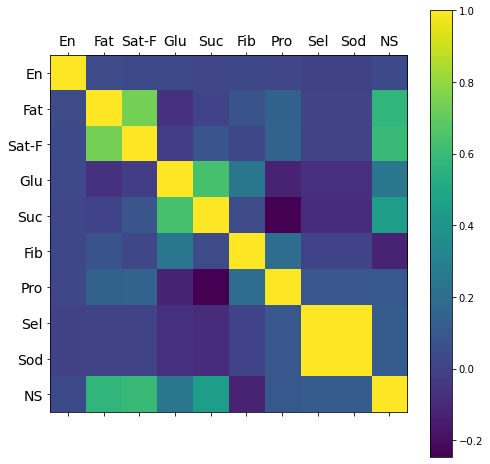

In [232]:
# Ici nous regardons la matrice de correlation pour les variables contenant au moins 10% de valeurs non nulles. 
# Nous n'apprenons rien de nouveau ici.

val_corr = open_ff_fr[["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g",
                      "proteins_100g", "salt_100g", "sodium_100g", "nutrition-score-fr_100g"]].copy()
matrix_2 = val_corr.corr()
liste_col_matrix_2 = matrix_2.columns.values.tolist()
val_t = []
for col in liste_col_matrix_2:
    val_50 = []
    val_50 = (matrix_2.loc[(matrix_2[col]<1) & (matrix_2[col]>0.4) | (matrix_2[col]>-1) & (matrix_2[col]<-0.4),col].values)
    #print((val_50))
    val_t.append(len(val_50))
#print(val_t)
matrix_2.loc[:,"val_t"] = (val_t)
display(round(matrix_2,4))

plt.figure(figsize=(8,8))
plt.matshow(matrix_2.iloc[:,:-1],fignum=1)
colon = ["En", "Fat", "Sat-F", "Glu","Suc", "Fib","Pro","Sel","Sod","NS"]
plt.xticks(range(10), colon, fontsize=14, rotation=0)
plt.yticks(range(10), colon, fontsize=14)
plt.colorbar()
plt.show()

1032 1111
292 375
49 2092


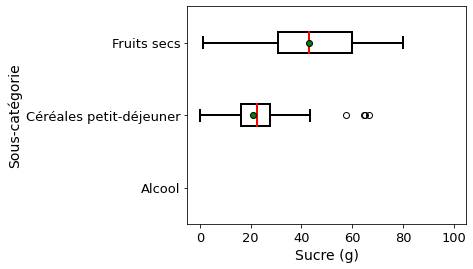

In [41]:
val_break = data_openff.loc[(data_openff["pnns_groups_2"]=="Breakfast cereals") & (data_openff["sugars_100g"].notnull()),
                           "sugars_100g"].values.tolist()
val_dried = data_openff.loc[(data_openff["pnns_groups_2"]=="Dried fruits") & (data_openff["sugars_100g"].notnull()),
                           "sugars_100g"].values.tolist()
val_break_tot = data_openff.loc[(data_openff["pnns_groups_2"]=="Breakfast cereals"),"sugars_100g"].values.tolist()
val_dried_tot = data_openff.loc[(data_openff["pnns_groups_2"]=="Dried fruits"),"sugars_100g"].values.tolist()
val_alc = data_openff.loc[(data_openff["pnns_groups_2"]=="Alcoholic beverages") & (data_openff["sugars_100g"].notnull()),
                           "sugars_100g"].values.tolist()
val_alc_tot = data_openff.loc[(data_openff["pnns_groups_2"]=="Alcoholic beverages"),"sugars_100g"].values.tolist()
print(len(val_break), len(val_break_tot))
print(len(val_dried), len(val_dried_tot))
print(len(val_alc), len(val_alc_tot))
val_comb = []

val_comb.append(np.nan)
val_comb.append(val_break)
val_comb.append(val_dried)
plt.figure(figsize=(5,4))
plt.boxplot(val_comb, vert=False, showfliers=True, patch_artist=True,
            boxprops=dict(facecolor="white", color="black", linewidth=2),
            whiskerprops=dict(color="black", linewidth=2),
            capprops=dict(color="black", linewidth=2),
            medianprops=dict(color="red",linewidth=2),
            showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'green'})
plt.yticks([1,2,3], ["Alcool","Céréales petit-déjeuner","Fruits secs"], fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Sous-catégorie", fontsize =14)
plt.xlabel("Sucre (g)", fontsize = 14)
plt.xlim(-5,105)
plt.show()